# EDA of Case_reported_and_value_of_property_taken_away_by_place_of_occurrence_2001_2012

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/tabrezkhan/Downloads/India_Crime - Copy/17_Case_reported_and_value_of_property_taken_away_by_place_of_occurrence_2001_2012.csv')
df

,STATE/UT,YEAR,Place Of Occurrence,Dacoity (Section 395-398 IPC) - Number of cases registered,Dacoity (Section 395-398 IPC) - Value Of Property Stolen (in rupees),"Robbery(Section 392-394, 397, 398 IPC) - Number of cases registered","Robbery(Section 392-394, 397, 398 IPC) - Value Of Property Stolen (in rupees)","Burglary(Section 449-452, 454, 455, 457-460 IPC) - Number of cases registered","Burglary(Section 449-452, 454, 455, 457-460 IPC) - Value Of Property Stolen (in rupees)",Theft (Section 379-382 IPC) - Number of cases registered,Theft (Section 379-382 IPC) - Value Of Property Stolen (in rupees)
0,Andhra Pradesh,2001,RESIDENTIAL PREMISES,100,4446961,177,5962460,5158,105324332,4257,53517835
1,Andhra Pradesh,2001,HIGH-WAY,57,5340335,172,6364866,31,2000574,74,1593092
2,Andhra Pradesh,2001,RIVER & SEA,2,145345,11,209330,101,1412516,110,1610200
3,Andhra Pradesh,2001,RAILWAYS,8,1750800,19,304336,6,24392,943,16418110
4,Andhra Pradesh,2001,RUNNING TRAINS,5,75000,3,164000,0,0,296,6170175
...,...,...,...,...,...,...,...,...,...,...,...
4339,Puducherry,2012,BANKS,0,0,0,0,0,0,0,0
4340,Puducherry,2012,COMMERCIAL ESTABLISHMENTS,2,58000,4,197230,26,2117964,20,647043
4341,Puducherry,2012,OTHER PLACES,2,575000,8,113100,4,25500,596,19689249
4342,Puducherry,2012,TOTAL (MANUAL),5,683000,16,2520330,77,12168314,658,23866392


In [3]:
#check for null values
df.isnull().sum()

STATE/UT                                                                                   0
YEAR                                                                                       0
Place Of Occurrence                                                                        0
Dacoity (Section 395-398 IPC) - Number of cases registered                                 0
Dacoity (Section 395-398 IPC) - Value Of Property Stolen (in rupees)                       0
Robbery(Section 392-394, 397, 398 IPC) - Number of cases registered                        0
Robbery(Section 392-394, 397, 398 IPC) - Value Of Property Stolen (in rupees)              0
Burglary(Section 449-452, 454, 455, 457-460 IPC) - Number of cases registered              0
Burglary(Section 449-452, 454, 455, 457-460 IPC) - Value Of Property Stolen (in rupees)    0
Theft (Section 379-382 IPC) - Number of cases registered                                   0
Theft (Section 379-382 IPC) - Value Of Property Stolen (in rupees)    

There are NO null values

In [4]:
df['STATE/UT'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'A&N Islands', 'Chandigarh', 'D&N Haveli',
       'Daman & Diu', 'Delhi UT', 'Lakshadweep', 'Puducherry'],
      dtype=object)

In [5]:
df['Place Of Occurrence'].unique()

array(['RESIDENTIAL PREMISES', 'HIGH-WAY', 'RIVER & SEA', 'RAILWAYS',
       'RUNNING TRAINS', 'OTHERS RLY.', 'BANKS',
       'COMMERCIAL ESTABLISHMENTS', 'OTHER PLACES', 'TOTAL (MANUAL)',
       'TOTAL COMPUTER FROM 1 TO 7'], dtype=object)

In [6]:
df[df['Place Of Occurrence'] == 'TOTAL (MANUAL)'].index

Int64Index([   9,   20,   31,   41,   51,   62,   72,   82,   92,  102,
            ...
            4250, 4261, 4271, 4282, 4292, 4302, 4312, 4322, 4332, 4342],
           dtype='int64', length=420)

In [7]:
#we need to clean unnecessary data so we will drop rows of TOTAL values as we do not need them because we will get the total number of cases and values in our analysis
df = df.drop(df[df['Place Of Occurrence'] == 'TOTAL (MANUAL)'].index)
df = df.drop(df[df['Place Of Occurrence'] == 'TOTAL COMPUTER FROM 1 TO 7'].index)

In [8]:
df

,STATE/UT,YEAR,Place Of Occurrence,Dacoity (Section 395-398 IPC) - Number of cases registered,Dacoity (Section 395-398 IPC) - Value Of Property Stolen (in rupees),"Robbery(Section 392-394, 397, 398 IPC) - Number of cases registered","Robbery(Section 392-394, 397, 398 IPC) - Value Of Property Stolen (in rupees)","Burglary(Section 449-452, 454, 455, 457-460 IPC) - Number of cases registered","Burglary(Section 449-452, 454, 455, 457-460 IPC) - Value Of Property Stolen (in rupees)",Theft (Section 379-382 IPC) - Number of cases registered,Theft (Section 379-382 IPC) - Value Of Property Stolen (in rupees)
0,Andhra Pradesh,2001,RESIDENTIAL PREMISES,100,4446961,177,5962460,5158,105324332,4257,53517835
1,Andhra Pradesh,2001,HIGH-WAY,57,5340335,172,6364866,31,2000574,74,1593092
2,Andhra Pradesh,2001,RIVER & SEA,2,145345,11,209330,101,1412516,110,1610200
3,Andhra Pradesh,2001,RAILWAYS,8,1750800,19,304336,6,24392,943,16418110
4,Andhra Pradesh,2001,RUNNING TRAINS,5,75000,3,164000,0,0,296,6170175
...,...,...,...,...,...,...,...,...,...,...,...
4337,Puducherry,2012,RUNNING TRAINS,0,0,0,0,0,0,0,0
4338,Puducherry,2012,OTHERS RLY.,0,0,0,0,0,0,0,0
4339,Puducherry,2012,BANKS,0,0,0,0,0,0,0,0
4340,Puducherry,2012,COMMERCIAL ESTABLISHMENTS,2,58000,4,197230,26,2117964,20,647043


In [9]:
#now let us check unique values
df['Place Of Occurrence'].unique()

array(['RESIDENTIAL PREMISES', 'HIGH-WAY', 'RIVER & SEA', 'RAILWAYS',
       'RUNNING TRAINS', 'OTHERS RLY.', 'BANKS',
       'COMMERCIAL ESTABLISHMENTS', 'OTHER PLACES'], dtype=object)

In [10]:
df = df.rename(columns={'Dacoity (Section 395-398 IPC) - Number of cases registered':'Dacoity - Number of cases registered',
          'Dacoity (Section 395-398 IPC) - Value Of Property Stolen (in rupees)':'Dacoity - Value Of Property Stolen (in rupees)',
          'Robbery(Section 392-394, 397, 398 IPC) - Number of cases registered':'Robbery- Number of cases registered',
           'Robbery(Section 392-394, 397, 398 IPC) - Value Of Property Stolen (in rupees)':'Robbery- Value Of Property Stolen (in rupees)',
           'Burglary(Section 449-452, 454, 455, 457-460 IPC) - Number of cases registered':'Burglary- Number of cases registered',
           'Burglary(Section 449-452, 454, 455, 457-460 IPC) - Value Of Property Stolen (in rupees)':'Burglary- Value Of Property Stolen (in rupees)',
           'Theft (Section 379-382 IPC) - Number of cases registered':'Theft - Number of cases registered',
           'Theft (Section 379-382 IPC) - Value Of Property Stolen (in rupees)':'Theft- Value Of Property Stolen (in rupees)'
          })

In [11]:
df.columns

Index(['STATE/UT', 'YEAR', 'Place Of Occurrence',
       'Dacoity - Number of cases registered',
       'Dacoity - Value Of Property Stolen (in rupees)',
       'Robbery- Number of cases registered',
       'Robbery- Value Of Property Stolen (in rupees)',
       'Burglary- Number of cases registered',
       'Burglary- Value Of Property Stolen (in rupees)',
       'Theft - Number of cases registered',
       'Theft- Value Of Property Stolen (in rupees)'],
      dtype='object')

In [12]:
#now let us insight states that recorded zero cases in all types of crimes
df_zero = df[(df['Dacoity - Number of cases registered'] == 0) & (df['Robbery- Number of cases registered']==0) & (df['Burglary- Number of cases registered'] ==0) & (df['Theft - Number of cases registered'] == 0)]
df_zero

,STATE/UT,YEAR,Place Of Occurrence,Dacoity - Number of cases registered,Dacoity - Value Of Property Stolen (in rupees),Robbery- Number of cases registered,Robbery- Value Of Property Stolen (in rupees),Burglary- Number of cases registered,Burglary- Value Of Property Stolen (in rupees),Theft - Number of cases registered,Theft- Value Of Property Stolen (in rupees)
13,Andhra Pradesh,2002,RIVER & SEA,0,0,0,0,0,0,0,0
68,Andhra Pradesh,2007,OTHERS RLY.,0,0,0,0,0,0,0,0
126,Arunachal Pradesh,2001,RAILWAYS,0,0,0,0,0,0,0,0
127,Arunachal Pradesh,2001,RUNNING TRAINS,0,0,0,0,0,0,0,0
128,Arunachal Pradesh,2001,OTHERS RLY.,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4335,Puducherry,2012,RIVER & SEA,0,0,0,0,0,0,0,0
4336,Puducherry,2012,RAILWAYS,0,0,0,0,0,0,0,0
4337,Puducherry,2012,RUNNING TRAINS,0,0,0,0,0,0,0,0
4338,Puducherry,2012,OTHERS RLY.,0,0,0,0,0,0,0,0


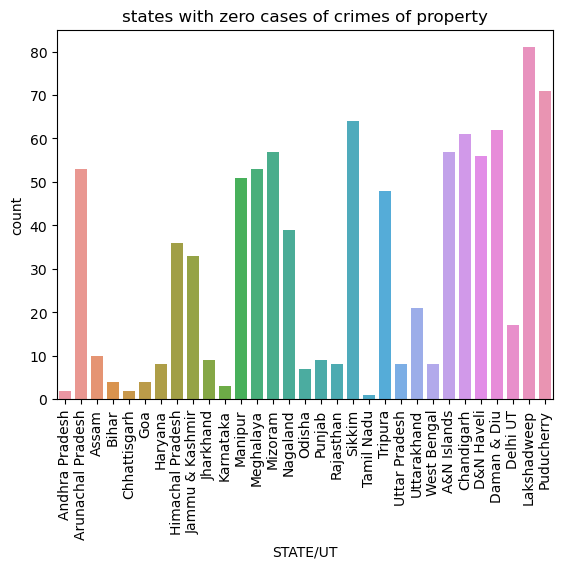

In [13]:
sns.countplot(x=df_zero['STATE/UT'])
plt.title('states with zero cases of crimes of property')
plt.xticks(rotation = 90)
plt.show()

state LAKSHADWEEP recorded the highest rate of zero crimes by its setions along the last decade so it is a safe state while state Tamil Nadu reported the lowest number of zero cases which refers to the high dangerous crimes rates in this state and the same statistics of low rates for states ANDHRA PRADESH and CHHATTISGARH

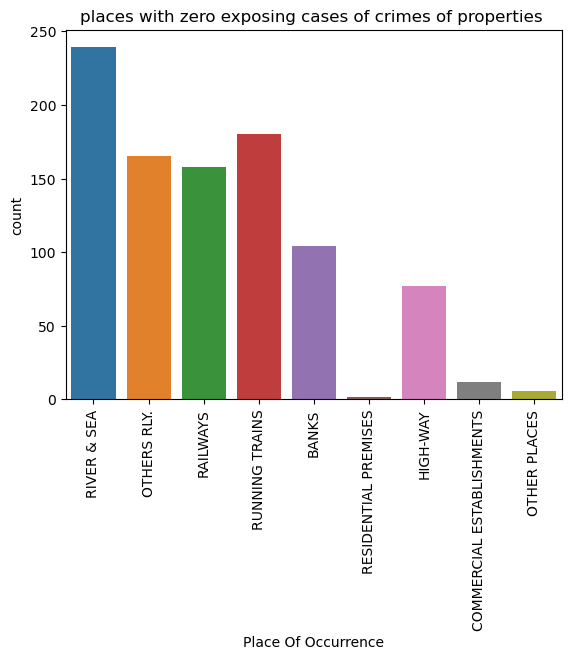

In [14]:
sns.countplot(x=df_zero['Place Of Occurrence'])
plt.title('places with zero exposing cases of crimes of properties ')
plt.xticks(rotation = 90)
plt.show()

- properties placed on Rivers and Seas are the most safest places with the highest recorded numbers of reported zero cases of crimes against them
- Residential premises recorded the lowest number of zero crimes which says they are the highest exposed properties to be stolen

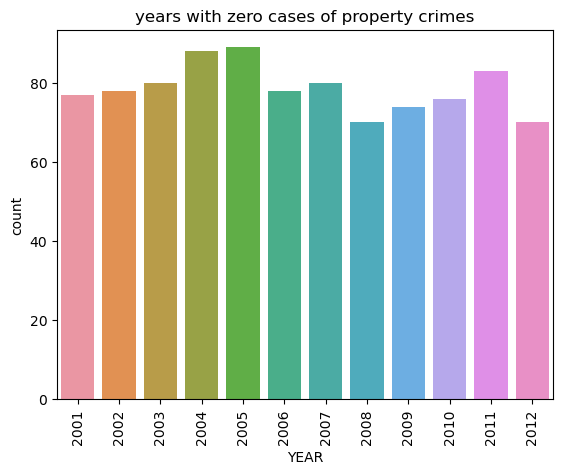

In [15]:
sns.countplot(x=df_zero['YEAR'])
plt.title('years with zero cases of property crimes')
plt.xticks(rotation=90)
plt.show()

year 2005 is thesafest year by its recorded the highest number of zero cases of property's crimes while 2008 ecorded the lowest number of zero crimes which refers to the high rate of crimes in it

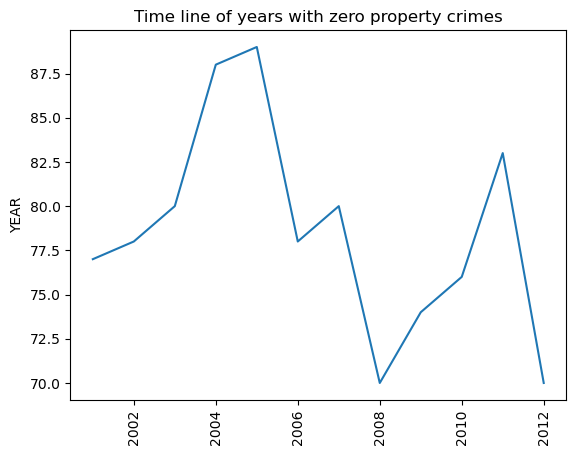

In [16]:
sns.lineplot(data = df_zero['YEAR'].value_counts())
plt.title('Time line of years with zero property crimes')
plt.xticks(rotation=90)
plt.show()

- between 2001 and 2005 we notice an increasing rate of zero property's crimes as the reported numbers are increasing
- between 2005 and 2008 we see a strong drop in the reported zero crimes which indicates to the increase in criminality against properties generally to increase again from 2008 to 2012

In [17]:
df.shape

(3779, 11)

In [18]:
# now let us drop dataset we do not need
df.drop(df_zero.index , inplace=True)

In [19]:
df.shape

(2836, 11)

In [20]:
df1 = pd.read_csv('/Users/tabrezkhan/Downloads/States data.csv')
df1

,STATE/UT,population,litercay rate,Area km^2
0,A & N ISLANDS,380581,86.63%,8249
1,ANDHRA PRADESH,84580777,67.02%,162970
2,ARUNACHAL PRADESH,1383727,65.38%,83743
3,ASSAM,31205576,72.19%,78438
4,BIHAR,104099452,61.80%,94163
5,CHANDIGARH,1055450,86.05%,114
6,CHHATTISGARH,25545198,70.28%,135192
7,D & N HAVELI,343709,76.24%,491
8,DAMAN & DIU,243247,87.10%,112
9,DELHI,16787941,86.21%,1483


In [21]:
df1['Density'] = df1['population'] / df1['Area km^2']
df1.head(5)

,STATE/UT,population,litercay rate,Area km^2,Density
0,A & N ISLANDS,380581,86.63%,8249,46.136623
1,ANDHRA PRADESH,84580777,67.02%,162970,518.995993
2,ARUNACHAL PRADESH,1383727,65.38%,83743,16.523495
3,ASSAM,31205576,72.19%,78438,397.837477
4,BIHAR,104099452,61.80%,94163,1105.523953


In [22]:
df['STATE/UT'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'A&N Islands', 'Chandigarh', 'D&N Haveli',
       'Daman & Diu', 'Delhi UT', 'Lakshadweep', 'Puducherry'],
      dtype=object)

In [23]:
df1['STATE/UT'].unique()

array(['A & N ISLANDS', 'ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM',
       'BIHAR', 'CHANDIGARH', 'CHHATTISGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'GOA', 'GUJARAT', 'HARYANA',
       'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA',
       'KERALA', 'LAKSHADWEEP', 'MADHYA PRADESH', 'MAHARASHTRA',
       'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND', 'ODISHA',
       'PUDUCHERRY', 'PUNJAB', 'RAJASTHAN', 'SIKKIM', 'TAMIL NADU',
       'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND', 'WEST BENGAL'],
      dtype=object)

In [24]:
df['STATE/UT'] = df['STATE/UT'].str.upper()
df['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A&N ISLANDS', 'CHANDIGARH', 'D&N HAVELI',
       'DAMAN & DIU', 'DELHI UT', 'LAKSHADWEEP', 'PUDUCHERRY'],
      dtype=object)

In [25]:
df['STATE/UT'] = df['STATE/UT'].replace({'DELHI UT':'DELHI' ,'D&N HAVELI':'D & N HAVELI' ,'A&N ISLANDS':'A & N ISLANDS' })

In [26]:
# now let us merge both of datasets :
dff = pd.merge(df,df1, on='STATE/UT',how='right') #how = 'right' we will locate df1 on the right of data
dff

,STATE/UT,YEAR,Place Of Occurrence,Dacoity - Number of cases registered,Dacoity - Value Of Property Stolen (in rupees),Robbery- Number of cases registered,Robbery- Value Of Property Stolen (in rupees),Burglary- Number of cases registered,Burglary- Value Of Property Stolen (in rupees),Theft - Number of cases registered,Theft- Value Of Property Stolen (in rupees),population,litercay rate,Area km^2,Density
0,A & N ISLANDS,2001,RESIDENTIAL PREMISES,0,0,0,0,47,815826,18,316667,380581,86.63%,8249,46.136623
1,A & N ISLANDS,2001,RIVER & SEA,0,0,0,0,0,0,1,2000,380581,86.63%,8249,46.136623
2,A & N ISLANDS,2001,COMMERCIAL ESTABLISHMENTS,0,0,0,0,7,456335,6,20050,380581,86.63%,8249,46.136623
3,A & N ISLANDS,2001,OTHER PLACES,0,0,4,40000,10,49800,40,256832,380581,86.63%,8249,46.136623
4,A & N ISLANDS,2002,RESIDENTIAL PREMISES,0,0,0,0,44,436992,16,303750,380581,86.63%,8249,46.136623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2831,WEST BENGAL,2012,RUNNING TRAINS,2,25000,11,158950,0,0,581,9218953,91276115,76.26%,88752,1028.440091
2832,WEST BENGAL,2012,OTHERS RLY.,0,0,6,848750,1,2600,479,4533533,91276115,76.26%,88752,1028.440091
2833,WEST BENGAL,2012,BANKS,9,5470994,140,5236660,3,980469,5,564829,91276115,76.26%,88752,1028.440091
2834,WEST BENGAL,2012,COMMERCIAL ESTABLISHMENTS,31,21764362,39,6176089,35,3802343,2186,1161367349,91276115,76.26%,88752,1028.440091


In [27]:
#check for null values
dff.isnull().sum()

STATE/UT                                          0
YEAR                                              0
Place Of Occurrence                               0
Dacoity - Number of cases registered              0
Dacoity - Value Of Property Stolen (in rupees)    0
Robbery- Number of cases registered               0
Robbery- Value Of Property Stolen (in rupees)     0
Burglary- Number of cases registered              0
Burglary- Value Of Property Stolen (in rupees)    0
Theft - Number of cases registered                0
Theft- Value Of Property Stolen (in rupees)       0
population                                        0
litercay rate                                     0
Area km^2                                         0
Density                                           0
dtype: int64

In [28]:
dff['total crimes'] = dff['Dacoity - Number of cases registered']+dff['Robbery- Number of cases registered']+dff['Burglary- Number of cases registered']+dff['Theft - Number of cases registered']
dff['total values of stolen properties'] = dff['Dacoity - Value Of Property Stolen (in rupees)']+dff['Robbery- Value Of Property Stolen (in rupees)']+dff['Burglary- Value Of Property Stolen (in rupees)']+dff['Theft- Value Of Property Stolen (in rupees)']

In [29]:
dff.head(5)

,STATE/UT,YEAR,Place Of Occurrence,Dacoity - Number of cases registered,Dacoity - Value Of Property Stolen (in rupees),Robbery- Number of cases registered,Robbery- Value Of Property Stolen (in rupees),Burglary- Number of cases registered,Burglary- Value Of Property Stolen (in rupees),Theft - Number of cases registered,Theft- Value Of Property Stolen (in rupees),population,litercay rate,Area km^2,Density,total crimes,total values of stolen properties
0,A & N ISLANDS,2001,RESIDENTIAL PREMISES,0,0,0,0,47,815826,18,316667,380581,86.63%,8249,46.136623,65,1132493
1,A & N ISLANDS,2001,RIVER & SEA,0,0,0,0,0,0,1,2000,380581,86.63%,8249,46.136623,1,2000
2,A & N ISLANDS,2001,COMMERCIAL ESTABLISHMENTS,0,0,0,0,7,456335,6,20050,380581,86.63%,8249,46.136623,13,476385
3,A & N ISLANDS,2001,OTHER PLACES,0,0,4,40000,10,49800,40,256832,380581,86.63%,8249,46.136623,54,346632
4,A & N ISLANDS,2002,RESIDENTIAL PREMISES,0,0,0,0,44,436992,16,303750,380581,86.63%,8249,46.136623,60,740742


# 2.1 Analysis of Literacy Rate vs Total Crimes

# We will indicate the summury of litercay rate based on year 2011 as we collect data based on the last census commissioner's data of 2011

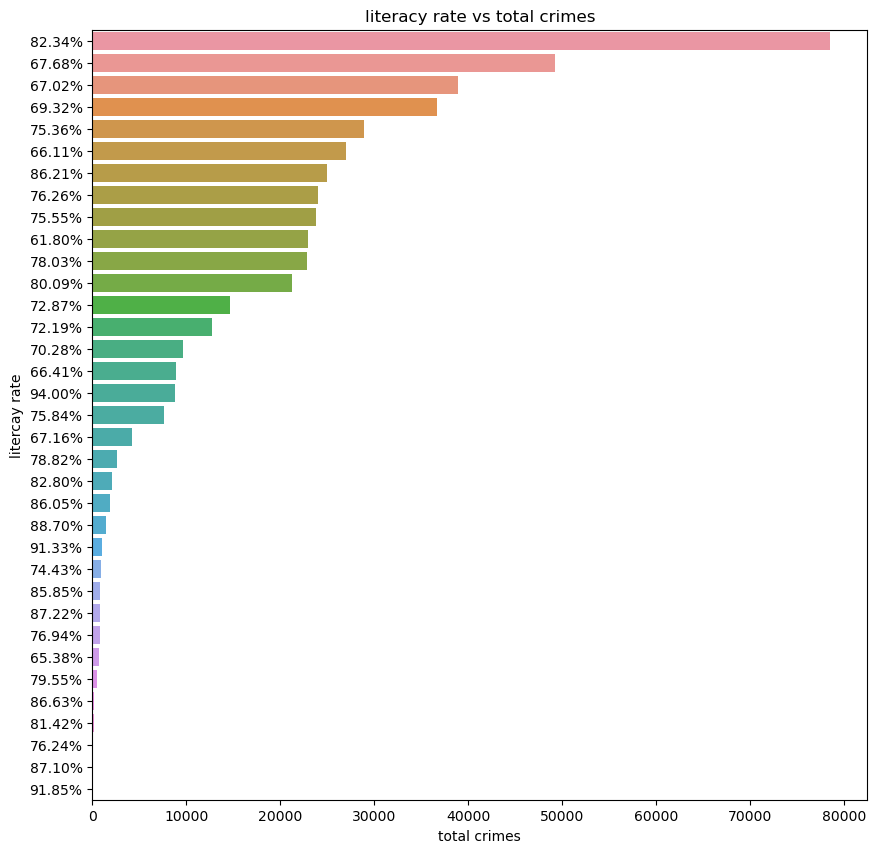

In [30]:
plt.figure(figsize=(10,10))
data = dff[dff['YEAR'] == 2011]
dt = data.groupby('litercay rate')['total crimes'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='total crimes' , y='litercay rate' , data=dt)
plt.title('literacy rate vs total crimes')
plt.show()

- population with literacy rate of 82.34 % recorded the highest number og crimes of property which is very noticable about the relation between high level of education and intendency to criminality while population with literacy rate of 67.68 % is in the second place
- most of literacy rates above 80% recorded total number of crimes lower than 10000
- the majority of literacy rate between 60 % to 80 % recorded total number of crimes above 10000 which says crimes of properties increased in societies with moderate education level

# 2.2 Analysis of the type of crime vs each state vs Literacy rate

# Literacy rate vs each type of crimes

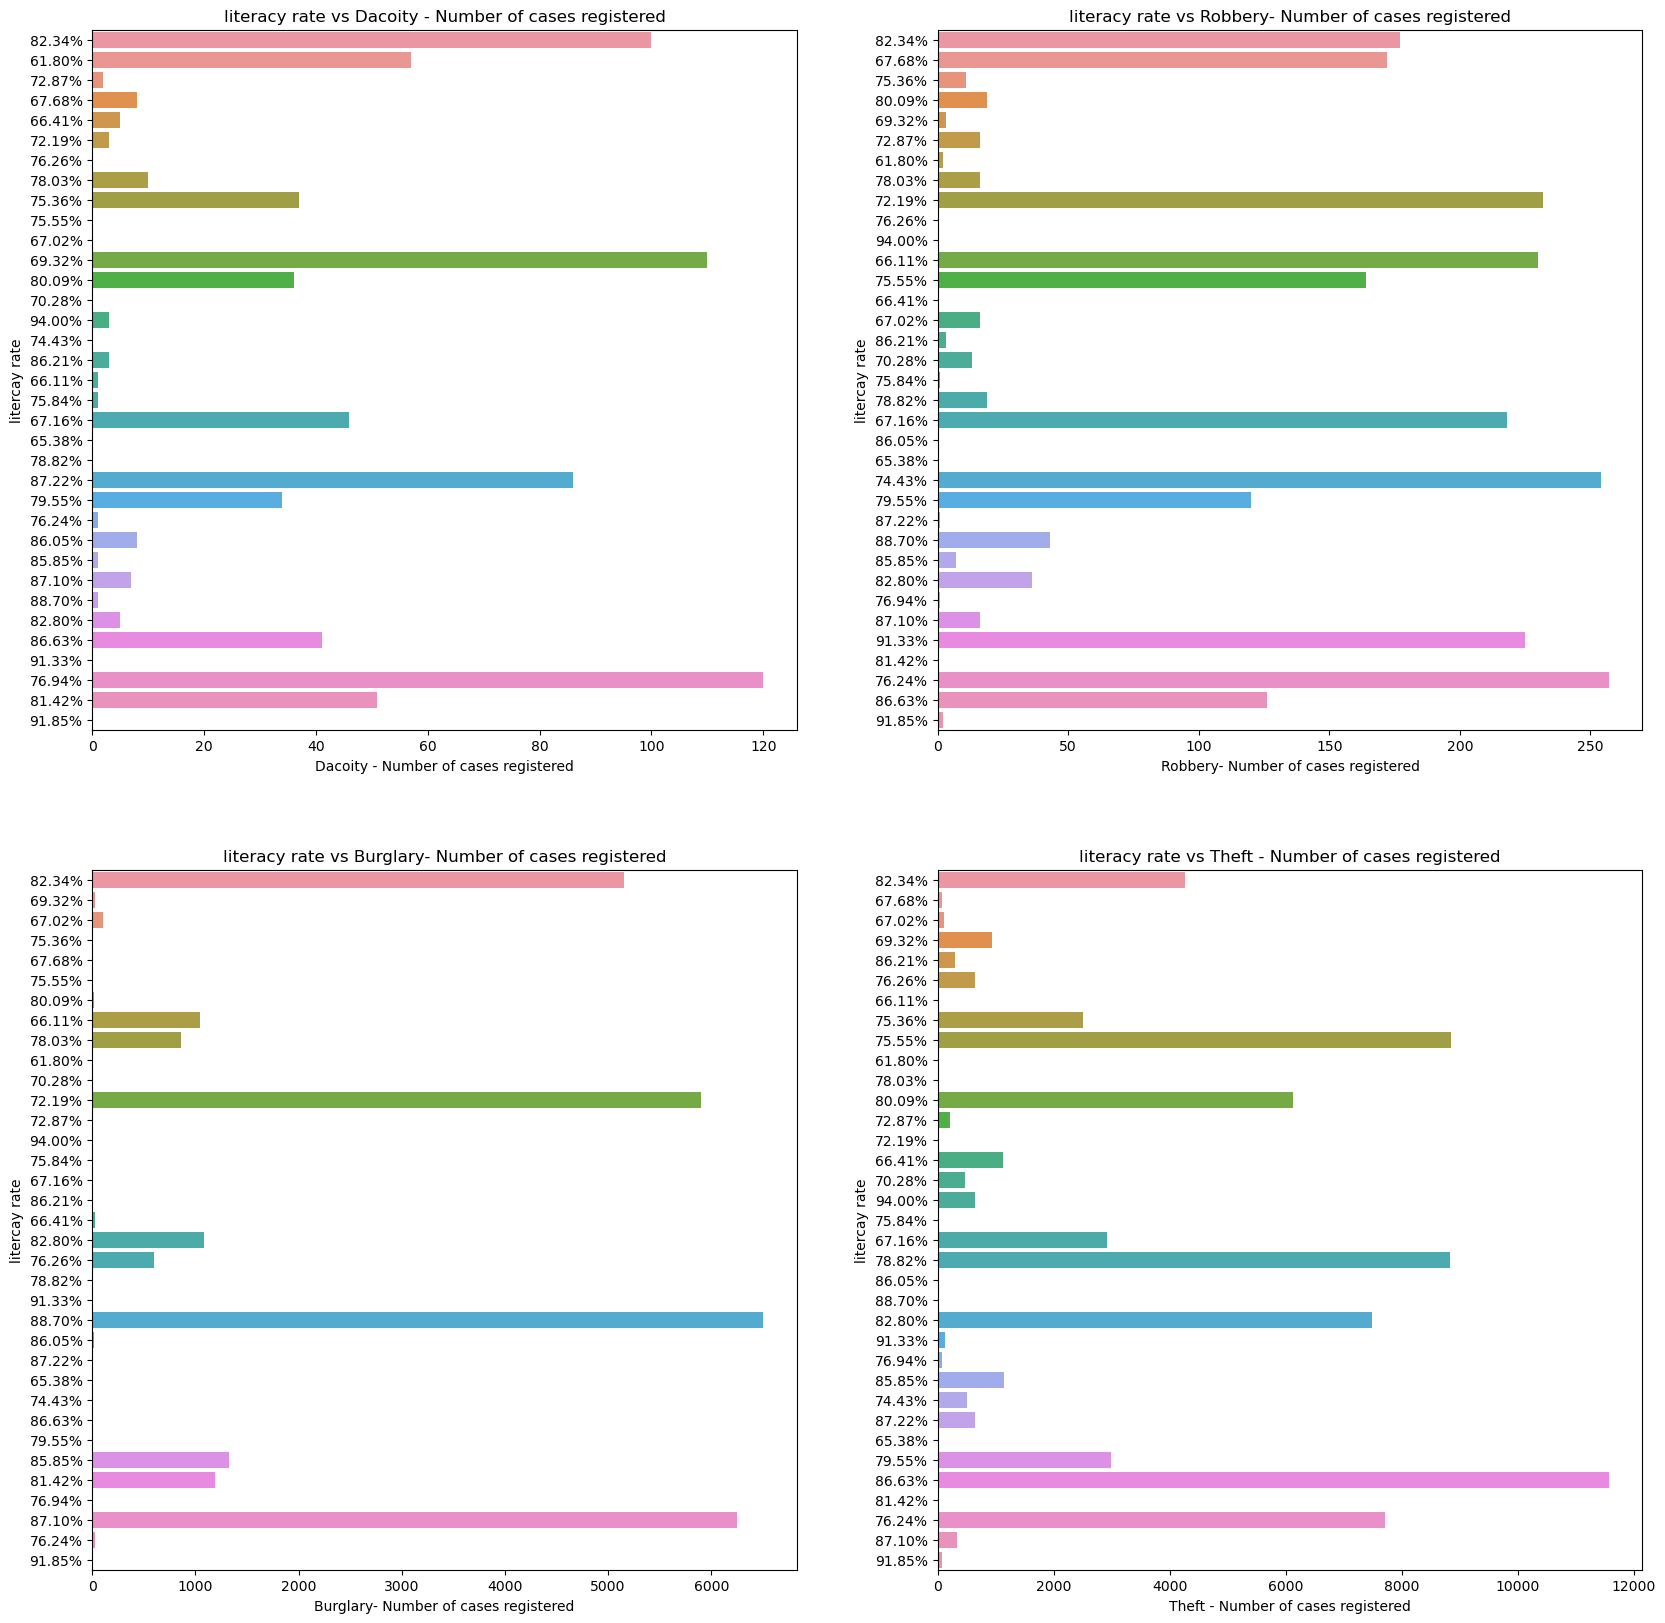

In [31]:
plt.figure(figsize=(20,20))
plot=1
data = dff[dff['YEAR']==2011]
cols = ['Dacoity - Number of cases registered' ,'Robbery- Number of cases registered',
       'Burglary- Number of cases registered' , 'Theft - Number of cases registered']
for i in cols :
    if plot <= 4 :
        ax= plt.subplot(2,2,plot)
        dt = data.groupby('litercay rate')[i].sum().sort_values(ascending=False).reset_index()
        sns.barplot(x=df[i] , y=dt['litercay rate'] , data=dt)
        plt.title('literacy rate vs {}'.format(i))
    plot +=1
plt.show()    

- according to year 2011 poulation with literacy rate of 82.34 % recorded the vey high numbers in all types of crimes of properties (Robbery , Dacoity , Theft and Burglary) which tells us that the high rates of education do not prevent crimes and on the other side population with moderate literacy rates between 60 to 70 % recorded the most of high numbers of crimes above 10000
- populations with high literacy rates of 86.63 % and 81.42 % recorded high numbers of theft crimes which insights a real issue of criminality
- some populations with literacy rate above 70 % recorded a noticable high rates of crimes in some types like literacy rate 7624 % recorded the highest number of Dacoity crimes and literacy rates of 88.70 % and 87.10 % respectively recorded the highest numbers of Burglary crimes
- literacy rate of 86.63 % recored the highest number of Theft crimes of properties
- criminality of properties are existed in all setors of educated societies and no matter the education level

# type of crime vs each state

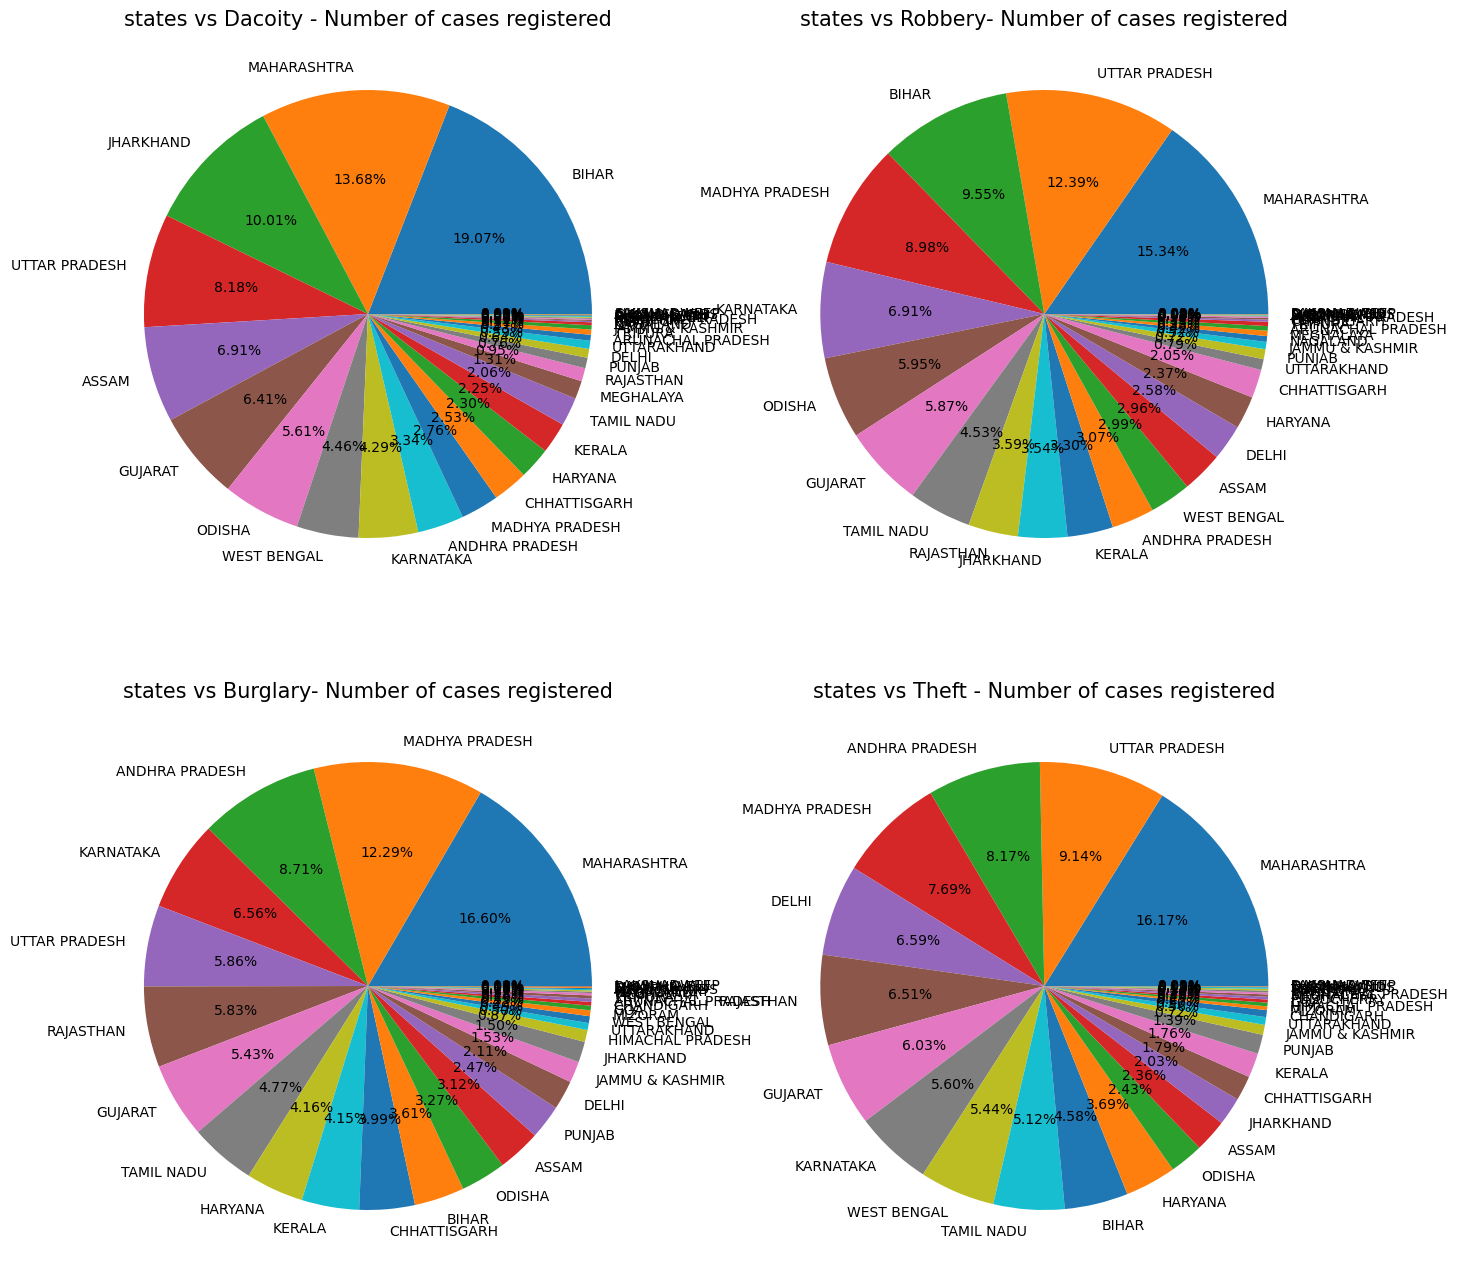

In [37]:
plt.figure(figsize=(16,16))
plot=1
cols = ['Dacoity - Number of cases registered' ,'Robbery- Number of cases registered',
       'Burglary- Number of cases registered' , 'Theft - Number of cases registered']
for i in cols :
    if plot <= 4 :
        ax= plt.subplot(2,2,plot)
        dtt = dff.groupby('STATE/UT')[i].sum().sort_values(ascending=False).reset_index()
        plt.pie(x=dtt[i] , labels=dtt['STATE/UT'].unique() , autopct='%0.2f%%' , data=dtt)
        plt.title('states vs {}'.format(i),fontsize=15)
    plot +=1
plt.show()    

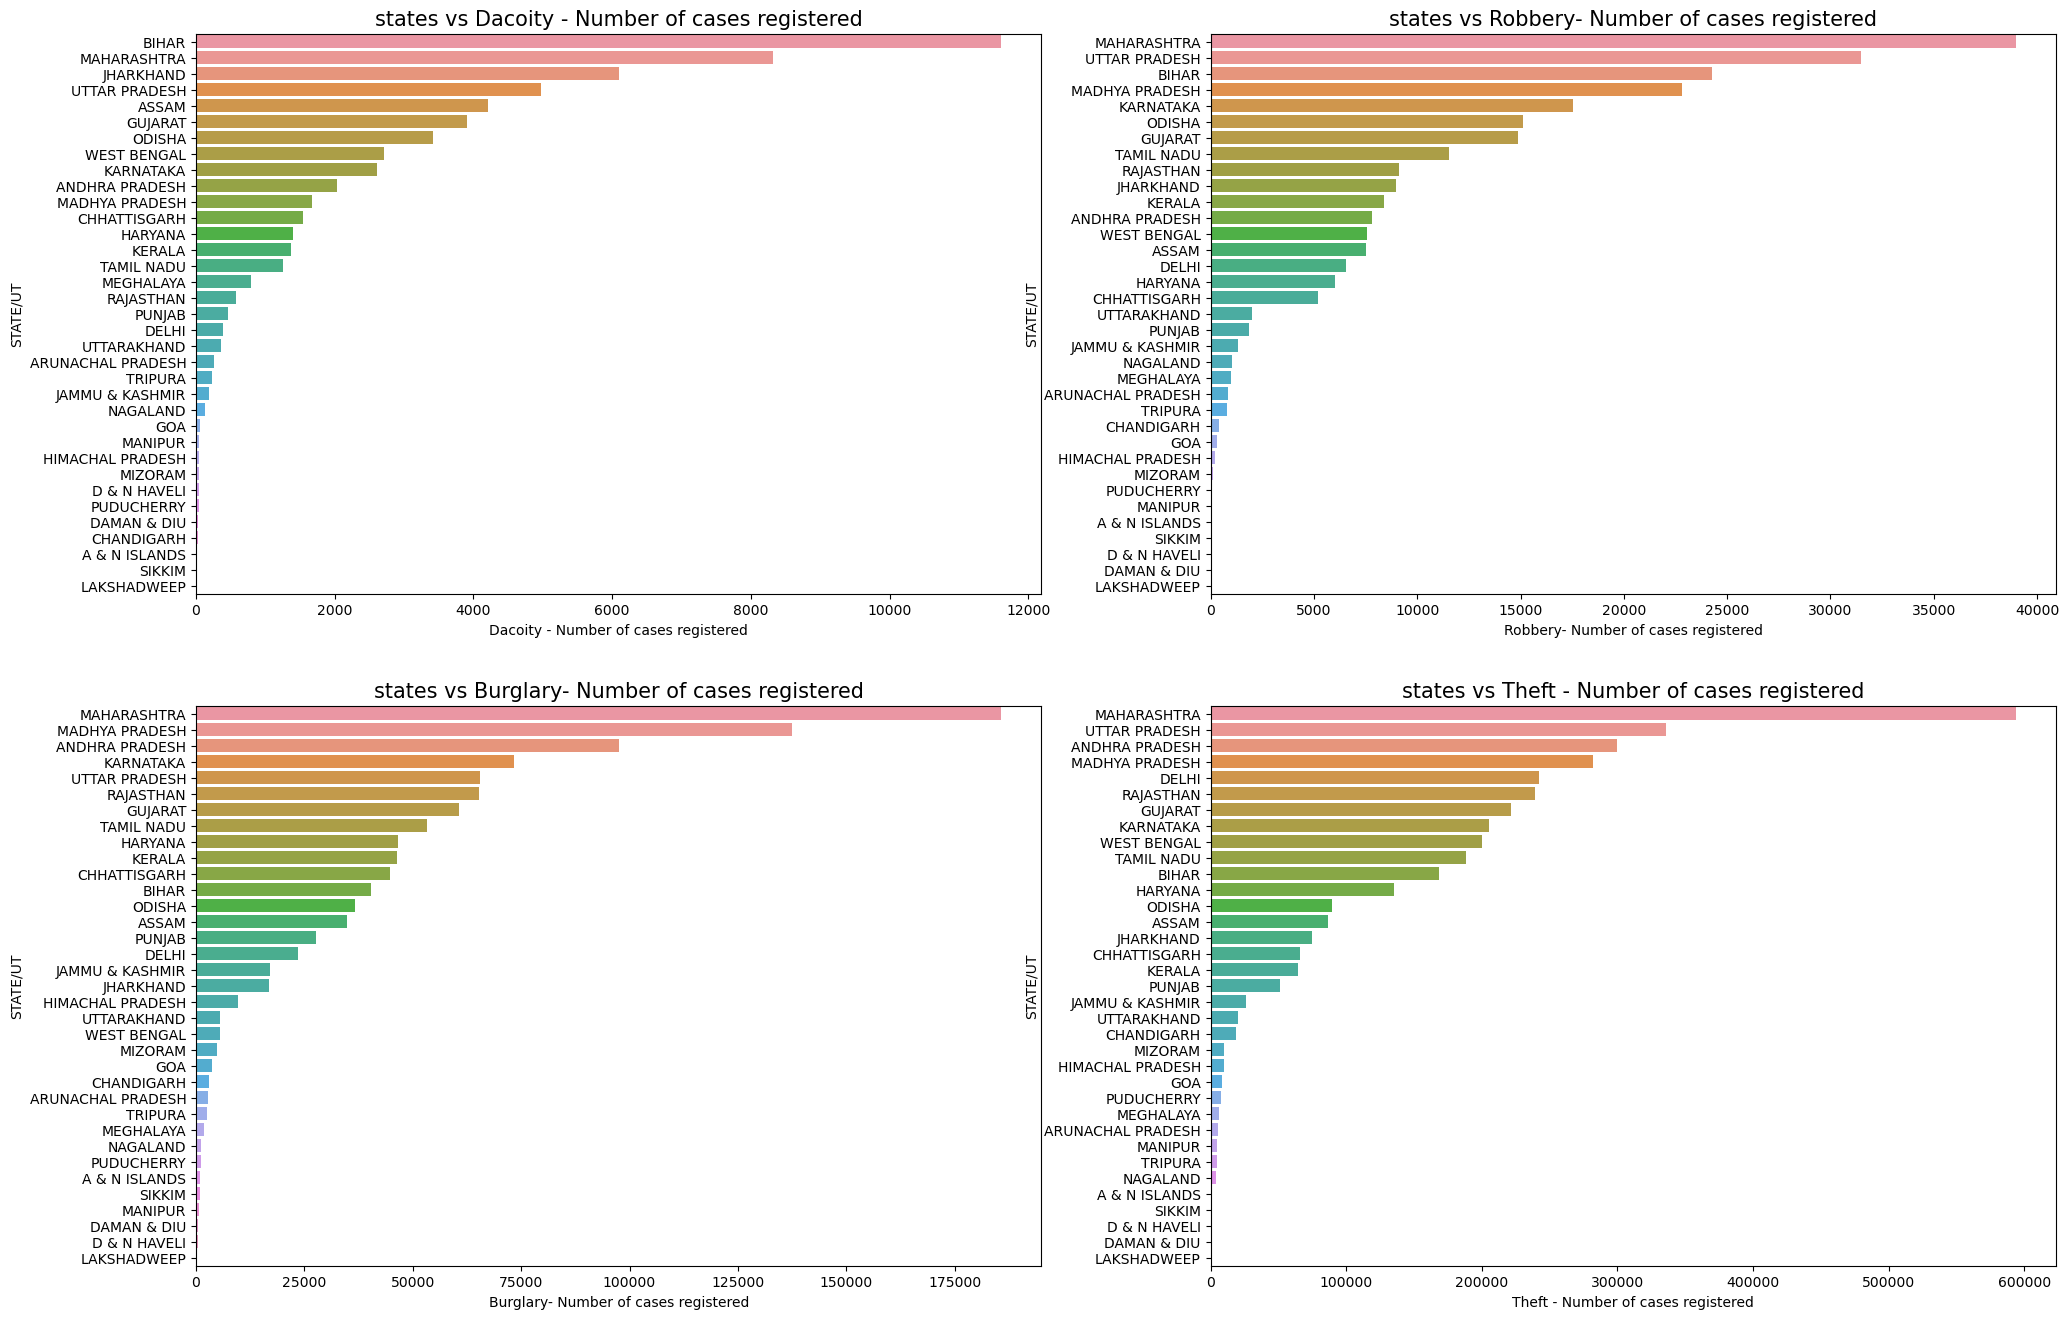

In [35]:
plt.figure(figsize=(24,16))
plot=1
cols = ['Dacoity - Number of cases registered' ,'Robbery- Number of cases registered',
       'Burglary- Number of cases registered' , 'Theft - Number of cases registered']
for i in cols :
    if plot <= 4 :
        ax= plt.subplot(2,2,plot)
        dtt = dff.groupby('STATE/UT')[i].sum().sort_values(ascending=False).reset_index()
        sns.barplot(x=dtt[i] , y=dtt['STATE/UT'] , data=dtt)
        plt.title('states vs {}'.format(i),fontsize=15)
    plot +=1
plt.show()    

- state MAHARASHTRA recorded the highest numbers of Robbery , Burglary and Theft crimes which says it is a very dangerous place on private and public propery
- state BIHAR recorded the highest number of Dacoity crimes and MAHARASHTRA is in the second place
- state LAKSHADWEEP recorded the lowest number of crimes in all types of stealing properties so it is a very safe place

In [38]:
prop1 = dff[['Dacoity - Number of cases registered' ,'Robbery- Number of cases registered',
       'Burglary- Number of cases registered' , 'Theft - Number of cases registered']].sum()
prop1

Dacoity - Number of cases registered      60869
Robbery- Number of cases registered      253972
Burglary- Number of cases registered    1118695
Theft - Number of cases registered      3671279
dtype: int64

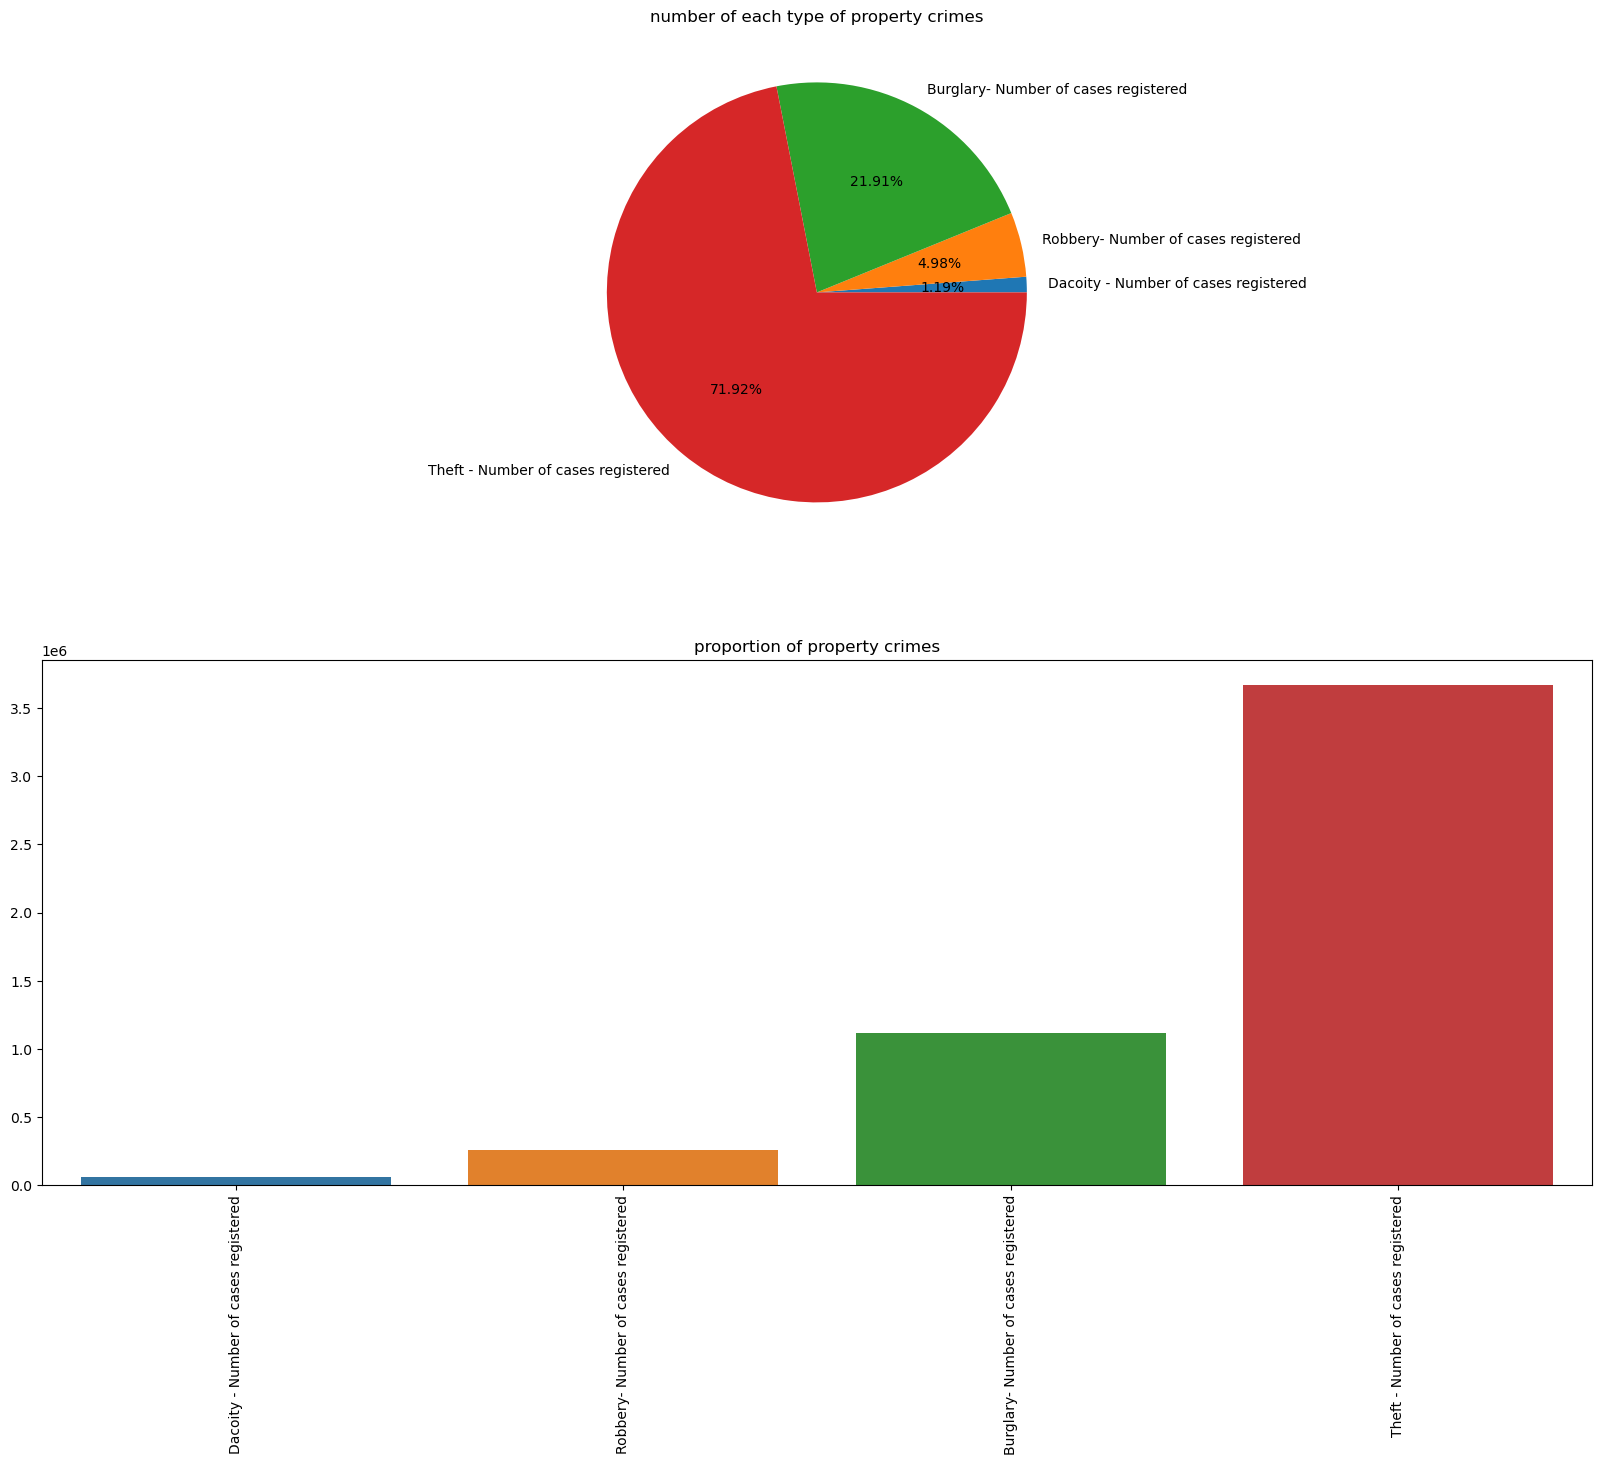

In [81]:
figure , axx = plt.subplots(2,1,figsize=(20,15))
sns.barplot(x= prop1.index , y= prop1.values , ax=axx[1])
axx[0].set_title('number of each type of property crimes')
plt.xticks(rotation=90)

prop1.plot(kind='pie' , autopct='%0.2f%%' , ax=axx[0])
axx[1].set_title('proportion of property crimes')
plt.show()

Theft crimes are the most reported in india in the last decade while Dacoity crimes are the least

# states vs overall crimes

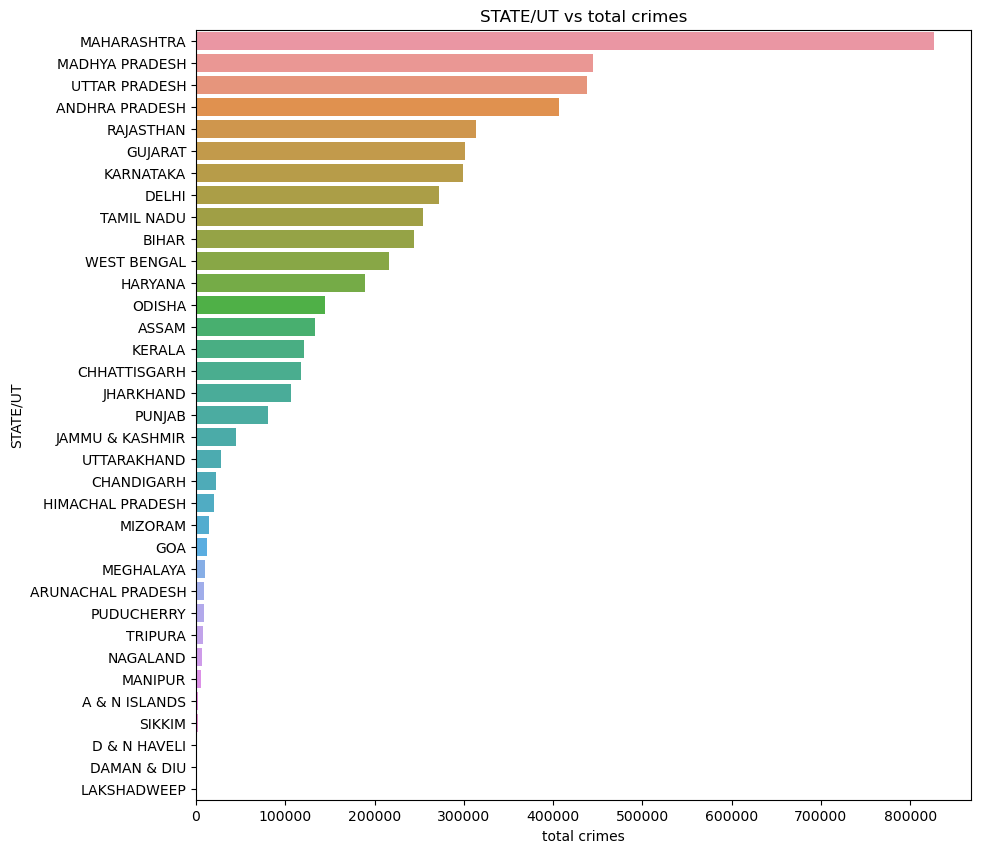

In [46]:
plt.figure(figsize=(10,10))
dt = dff.groupby('STATE/UT')['total crimes'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='total crimes' , y='STATE/UT' , data=dt)
plt.title('STATE/UT vs total crimes')
plt.show()

MAHARASHTRA scored the highest number of crimes of properties in india in the last  decade while states MADHYA PRADESH and UTTAR PRADESH respectively are in the second and third places and finaaly we notice that state LAKSHADWEEP is the least statistical state of recorded crimes of property which means it is a very safe place

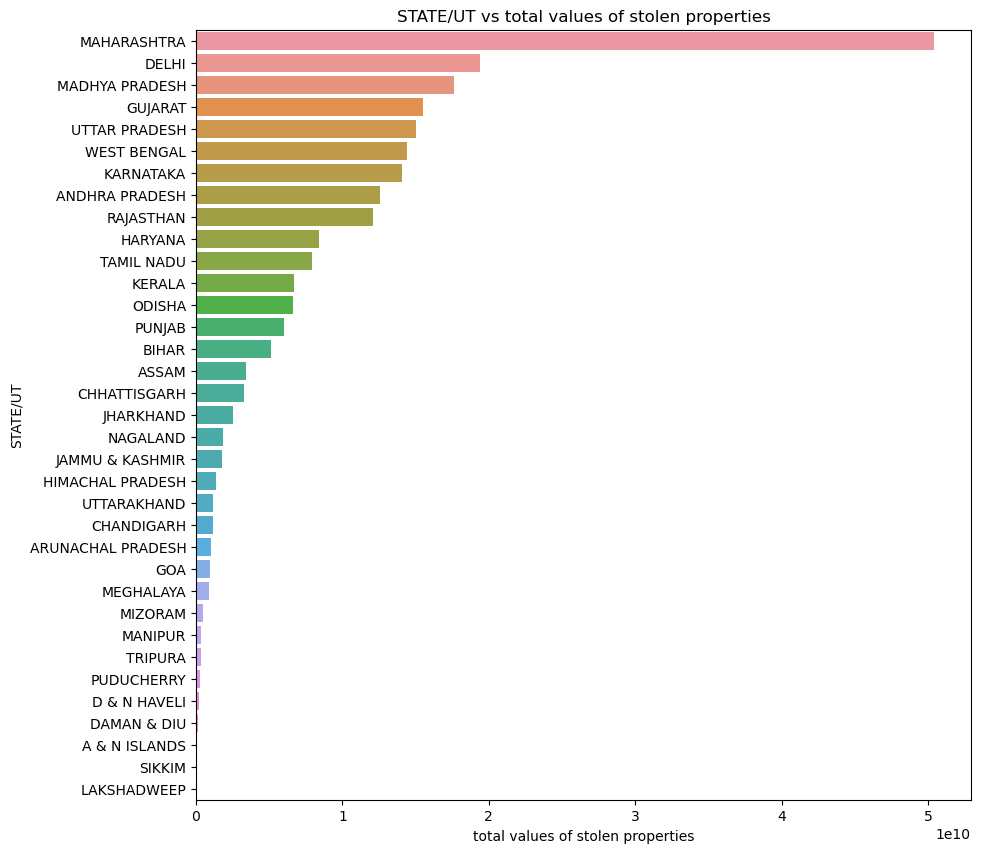

In [74]:
plt.figure(figsize=(10,10))
dt = dff.groupby('STATE/UT')['total values of stolen properties'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='total values of stolen properties' , y='STATE/UT' , data=dt)
plt.title('STATE/UT vs total values of stolen properties')
plt.show()

MAHARASHTRA scored the highest values in Rupees of loss in sector of properties while Delhi the capital in the second rate despite it is not the most or the highest satate in recorded crimes but that is as its high valuable assets as the caital of the country and state LAKSHADWEEP scored the lowest cost of loss in properties because of the very low numbers of crimes in it

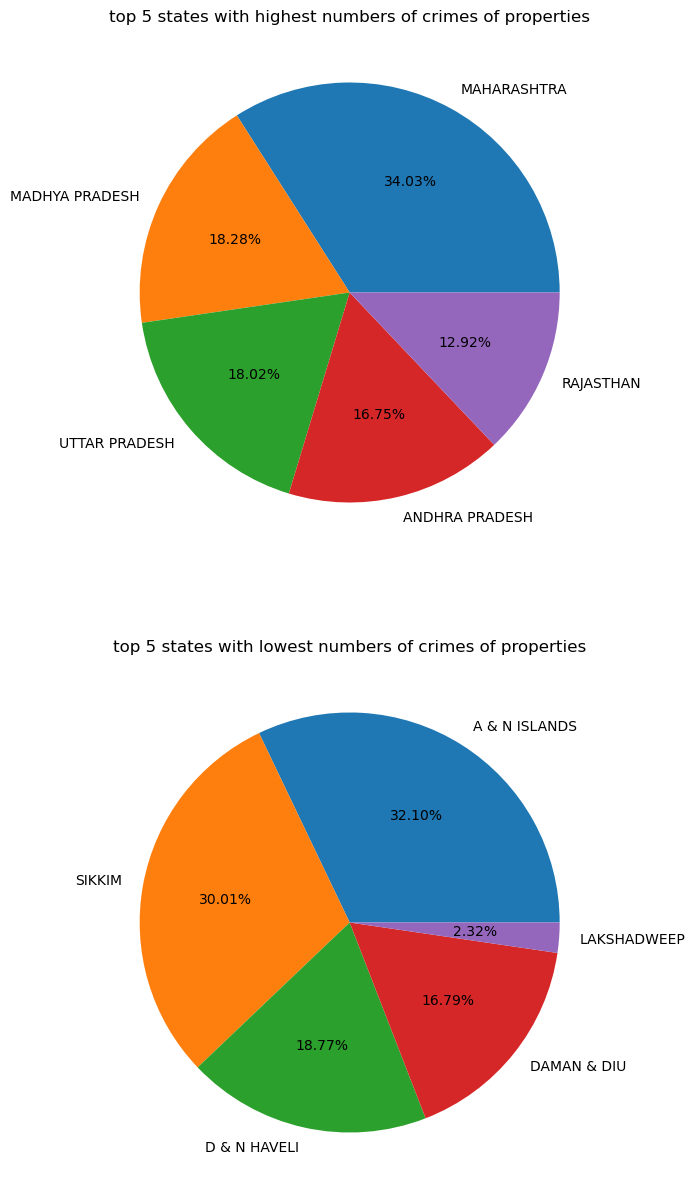

In [68]:
figure,ax= plt.subplots(2,1,figsize=(20,15))

plt.subplot(2,1,1)
dt = dff.groupby('STATE/UT')['total crimes'].sum().sort_values(ascending=False).reset_index()[:5]
plt.pie(x=dt['total crimes'] , labels=dt['STATE/UT'].unique() , data=dt , autopct='%0.2f%%')
plt.title('top 5 states with highest numbers of crimes of properties')

plt.subplot(2,1,2)
dt = dff.groupby('STATE/UT')['total crimes'].sum().sort_values(ascending=False).reset_index()[-5:]
plt.pie(x=dt['total crimes'] , labels=dt['STATE/UT'].unique() , data=dt , autopct='%0.2f%%')
plt.title('top 5 states with lowest numbers of crimes of properties')

plt.show()

MAHARASHTRA scored the highest number of crimes of properties in india in the last decade while states MADHYA PRADESH and UTTAR PRADESH respectively are in the second and third places and finaaly we notice that state LAKSHADWEEP is the least statistical state of recorded crimes of property which means it is a very safe place

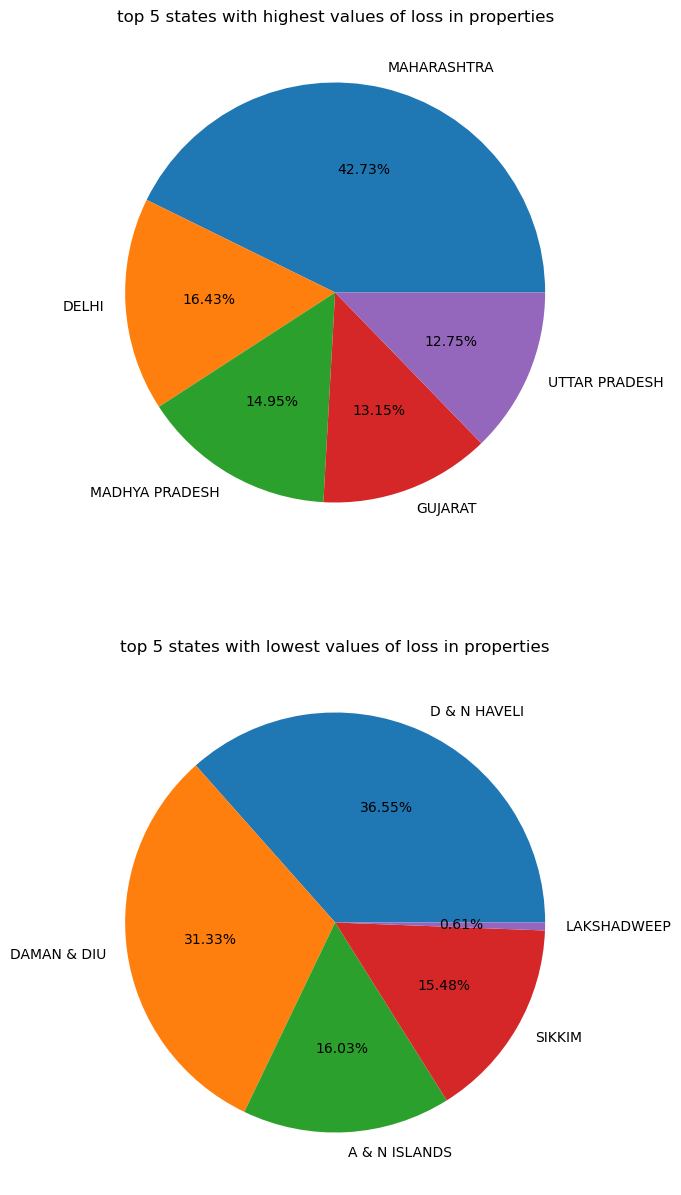

In [75]:
figure,ax= plt.subplots(2,1,figsize=(20,15))

plt.subplot(2,1,1)
dt = dff.groupby('STATE/UT')['total values of stolen properties'].sum().sort_values(ascending=False).reset_index()[:5]
plt.pie(x=dt['total values of stolen properties'] , labels=dt['STATE/UT'].unique() , data=dt , autopct='%0.2f%%')
plt.title('top 5 states with highest values of loss in properties')

plt.subplot(2,1,2)
dt = dff.groupby('STATE/UT')['total values of stolen properties'].sum().sort_values(ascending=False).reset_index()[-5:]
plt.pie(x=dt['total values of stolen properties'] , labels=dt['STATE/UT'].unique() , data=dt , autopct='%0.2f%%')
plt.title('top 5 states with lowest values of loss in properties')

plt.show()

state MAHARASHTRA scored the highest values of losses in properties because of crimes in them and state MAHARASHTRA and Delhi have more than half of losses's costs in properties because of criminality while state LAKSHADWEEP scored the lowest value of loss in properties

# Each state vs losses in values

In [85]:
df.columns

Index(['STATE/UT', 'YEAR', 'Place Of Occurrence',
       'Dacoity - Number of cases registered',
       'Dacoity - Value Of Property Stolen (in rupees)',
       'Robbery- Number of cases registered',
       'Robbery- Value Of Property Stolen (in rupees)',
       'Burglary- Number of cases registered',
       'Burglary- Value Of Property Stolen (in rupees)',
       'Theft - Number of cases registered',
       'Theft- Value Of Property Stolen (in rupees)'],
      dtype='object')

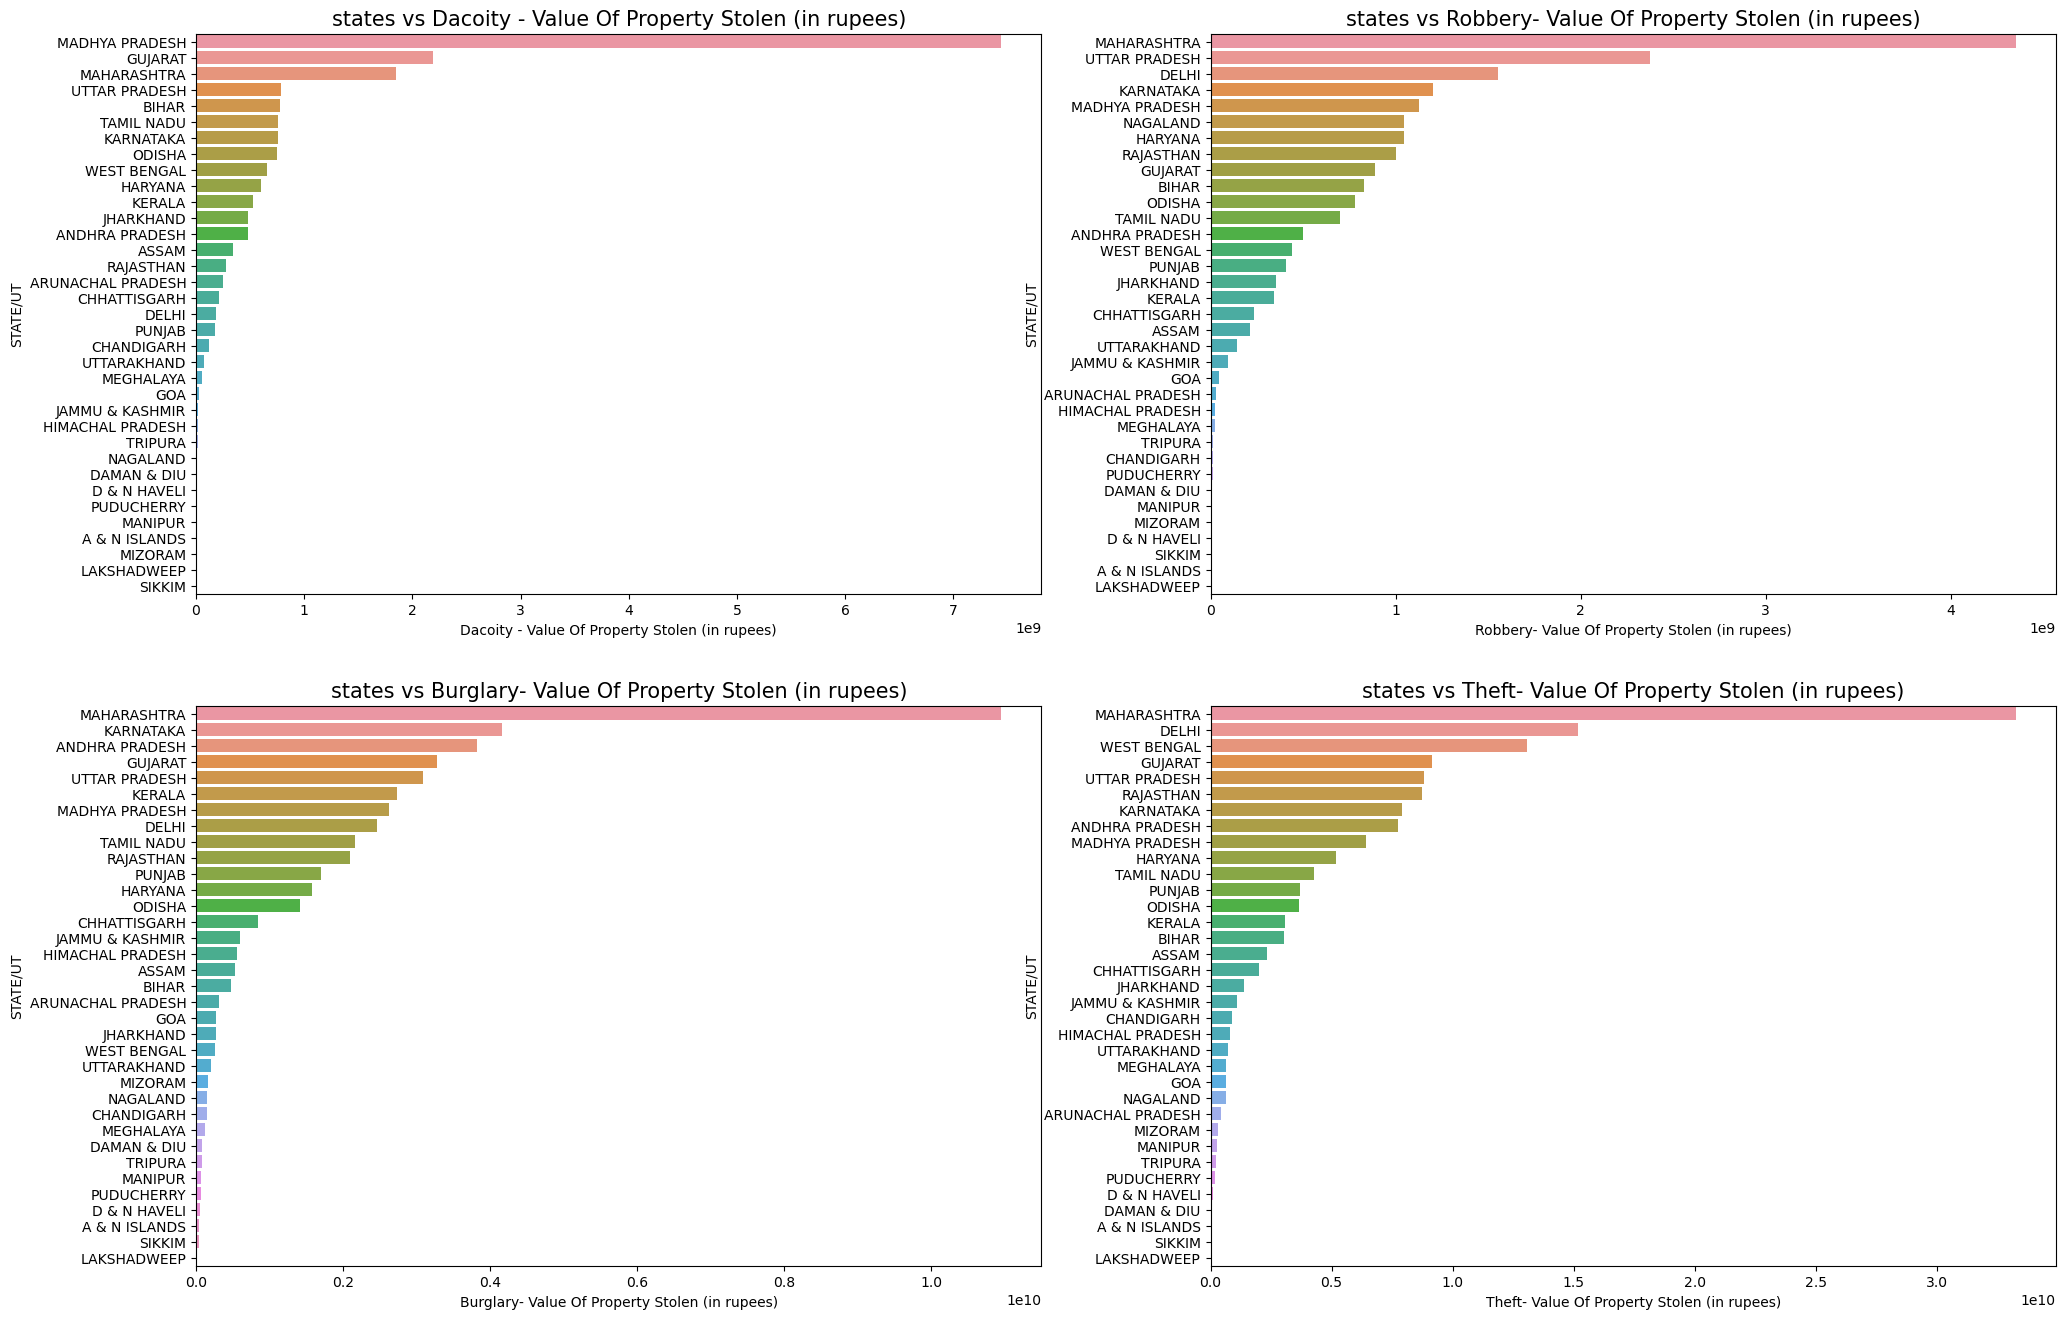

In [86]:
plt.figure(figsize=(24,16))
plot=1
cols = ['Dacoity - Value Of Property Stolen (in rupees)',
       'Robbery- Value Of Property Stolen (in rupees)',
       'Burglary- Value Of Property Stolen (in rupees)',
       'Theft- Value Of Property Stolen (in rupees)']
for i in cols :
    if plot <= 4 :
        ax= plt.subplot(2,2,plot)
        dtt = dff.groupby('STATE/UT')[i].sum().sort_values(ascending=False).reset_index()
        sns.barplot(x=dtt[i] , y=dtt['STATE/UT'] , data=dtt)
        plt.title('states vs {}'.format(i),fontsize=15)
    plot +=1
plt.show()    

- state MAHARASHTRA recorded the highest values of loss in properties because of Robery , Burglary and Theft crimes while state MADHYA PRADESH scored the highest loss because of Dacoity crimes
- state Delhi very high loss in values and assets because of Robbery and theft crimes
- state LAKSHADWEEP scored the lowest value of losses in properties in india 

# places of occurance vs crimes

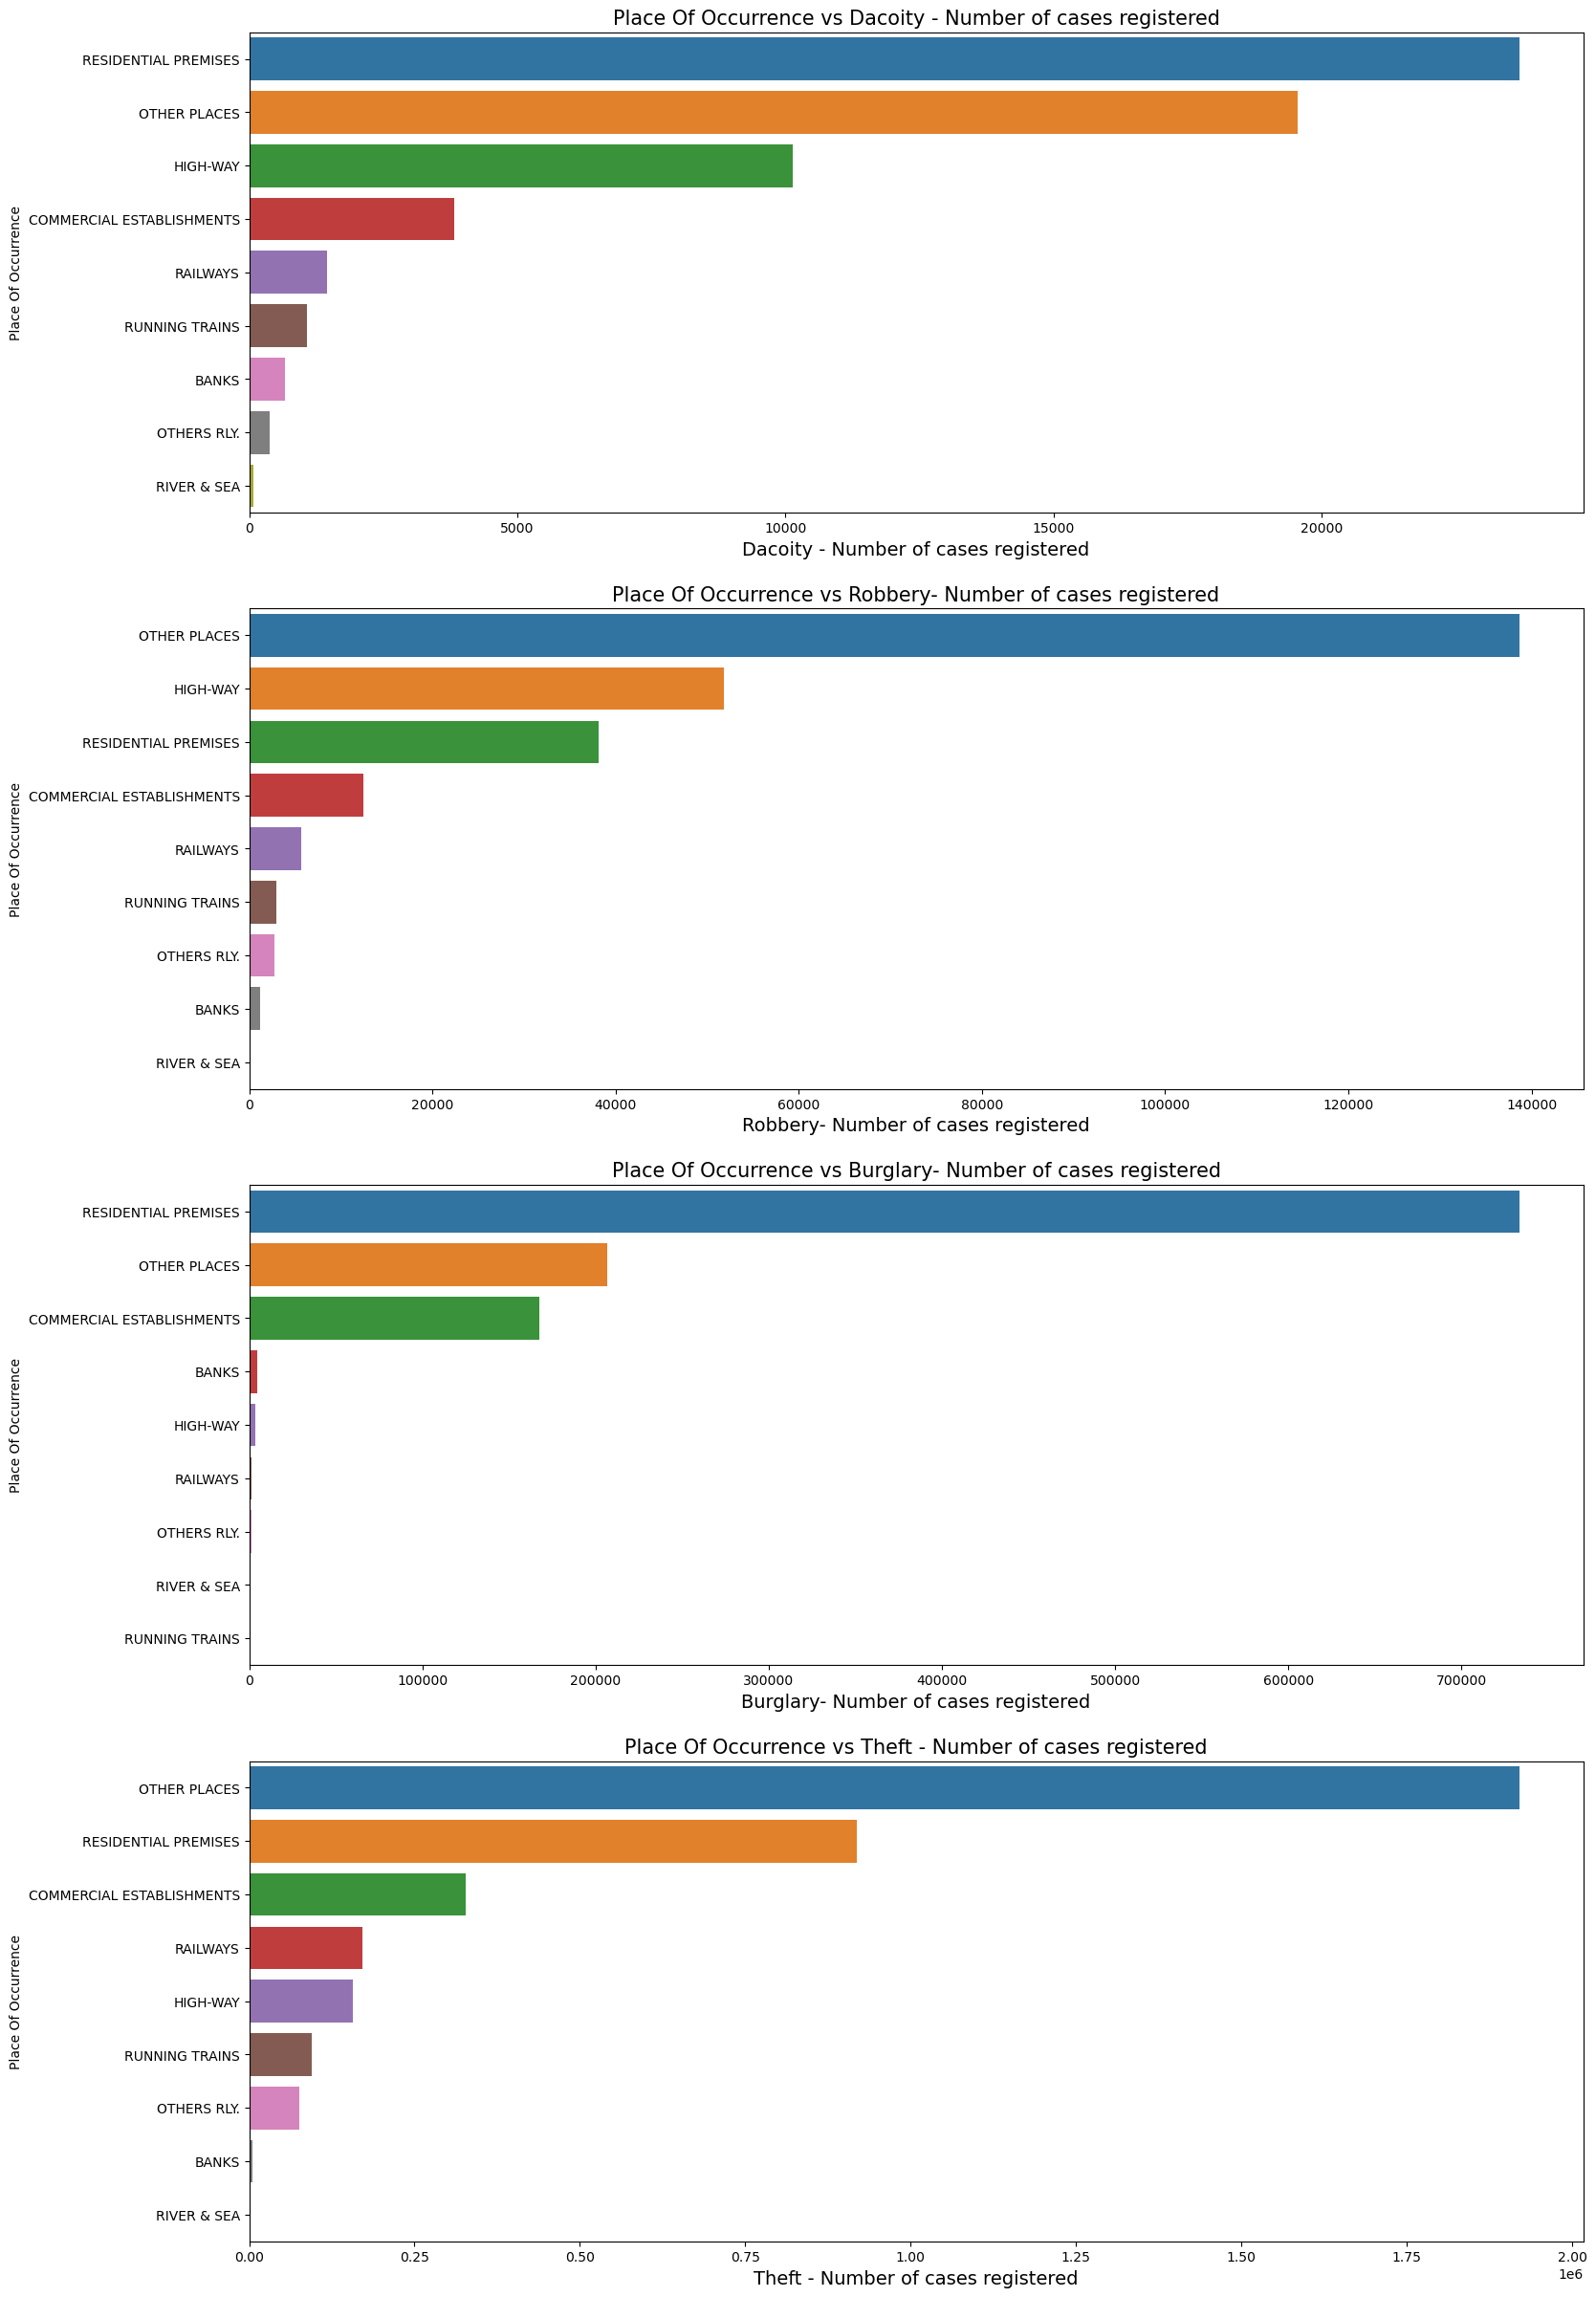

In [69]:
plt.figure(figsize=(18,30))
plot=1
cols = ['Dacoity - Number of cases registered' ,'Robbery- Number of cases registered',
       'Burglary- Number of cases registered' , 'Theft - Number of cases registered']
for i in cols :
    if plot <= 4 :
        ax= plt.subplot(4,1,plot)
        dtt = dff.groupby('Place Of Occurrence')[i].sum().sort_values(ascending=False).reset_index()
        sns.barplot(x=dtt[i] , y=dtt['Place Of Occurrence'] , data=dtt)
        plt.title('Place Of Occurrence vs {}'.format(i),fontsize=15)
        plt.xlabel(i , fontsize=14)
    plot +=1
plt.show()    

from above summury we notice that :
- most of Dacoity and Burglary crimes happened in Residential premises
- most of robbery and Theft crimes happened in other unlabelled places like vagabond housings
- Banks and properties on Rivers and seas recorded very low crimes in ll types of stealing properties
- Highways recorded more than 10000 Dacoity crimes in the last decade which says highways are not safe to travel on individually
- Commercial Establishements is not the most common target of stealing properties

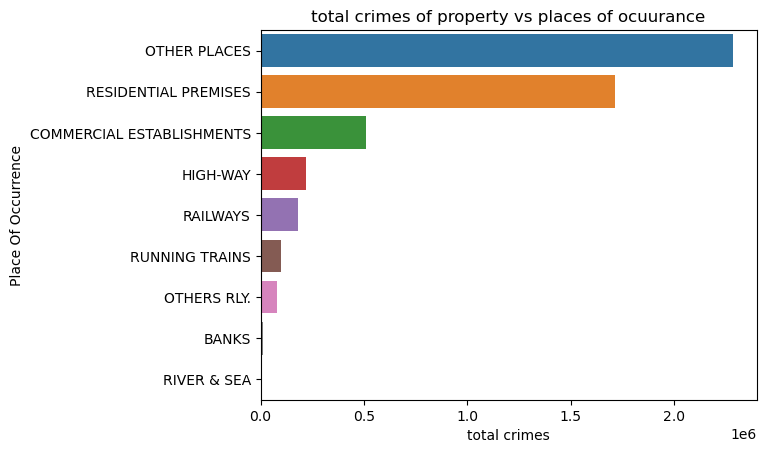

In [70]:
dtt = dff.groupby('Place Of Occurrence')['total crimes'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x=dtt['total crimes'] , y=dtt['Place Of Occurrence'] , data=dtt)
plt.title('total crimes of property vs places of ocuurance')
plt.show()

- other unlabelled places like vagabond housing are the most stolen properties in indian in the last decade as it is lacking to civilised services and security and residential premises are in the second place due to it widespreading existance and easy access to them and as we see Banks and properties on Rivers and Seas are the least stolen properties in india

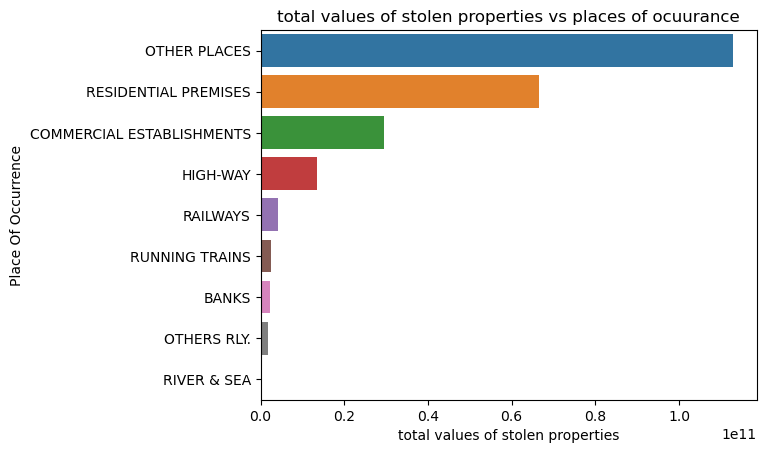

In [83]:
dtt = dff.groupby('Place Of Occurrence')['total values of stolen properties'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x=dtt['total values of stolen properties'] , y=dtt['Place Of Occurrence'] , data=dtt)
plt.title('total values of stolen properties vs places of ocuurance')
plt.show()

most of economical losses in properties happened in other unlabelled places like vagabond housing while residential premises come in the second place and Banks and properties on Rivers and seas record a very low loss in values

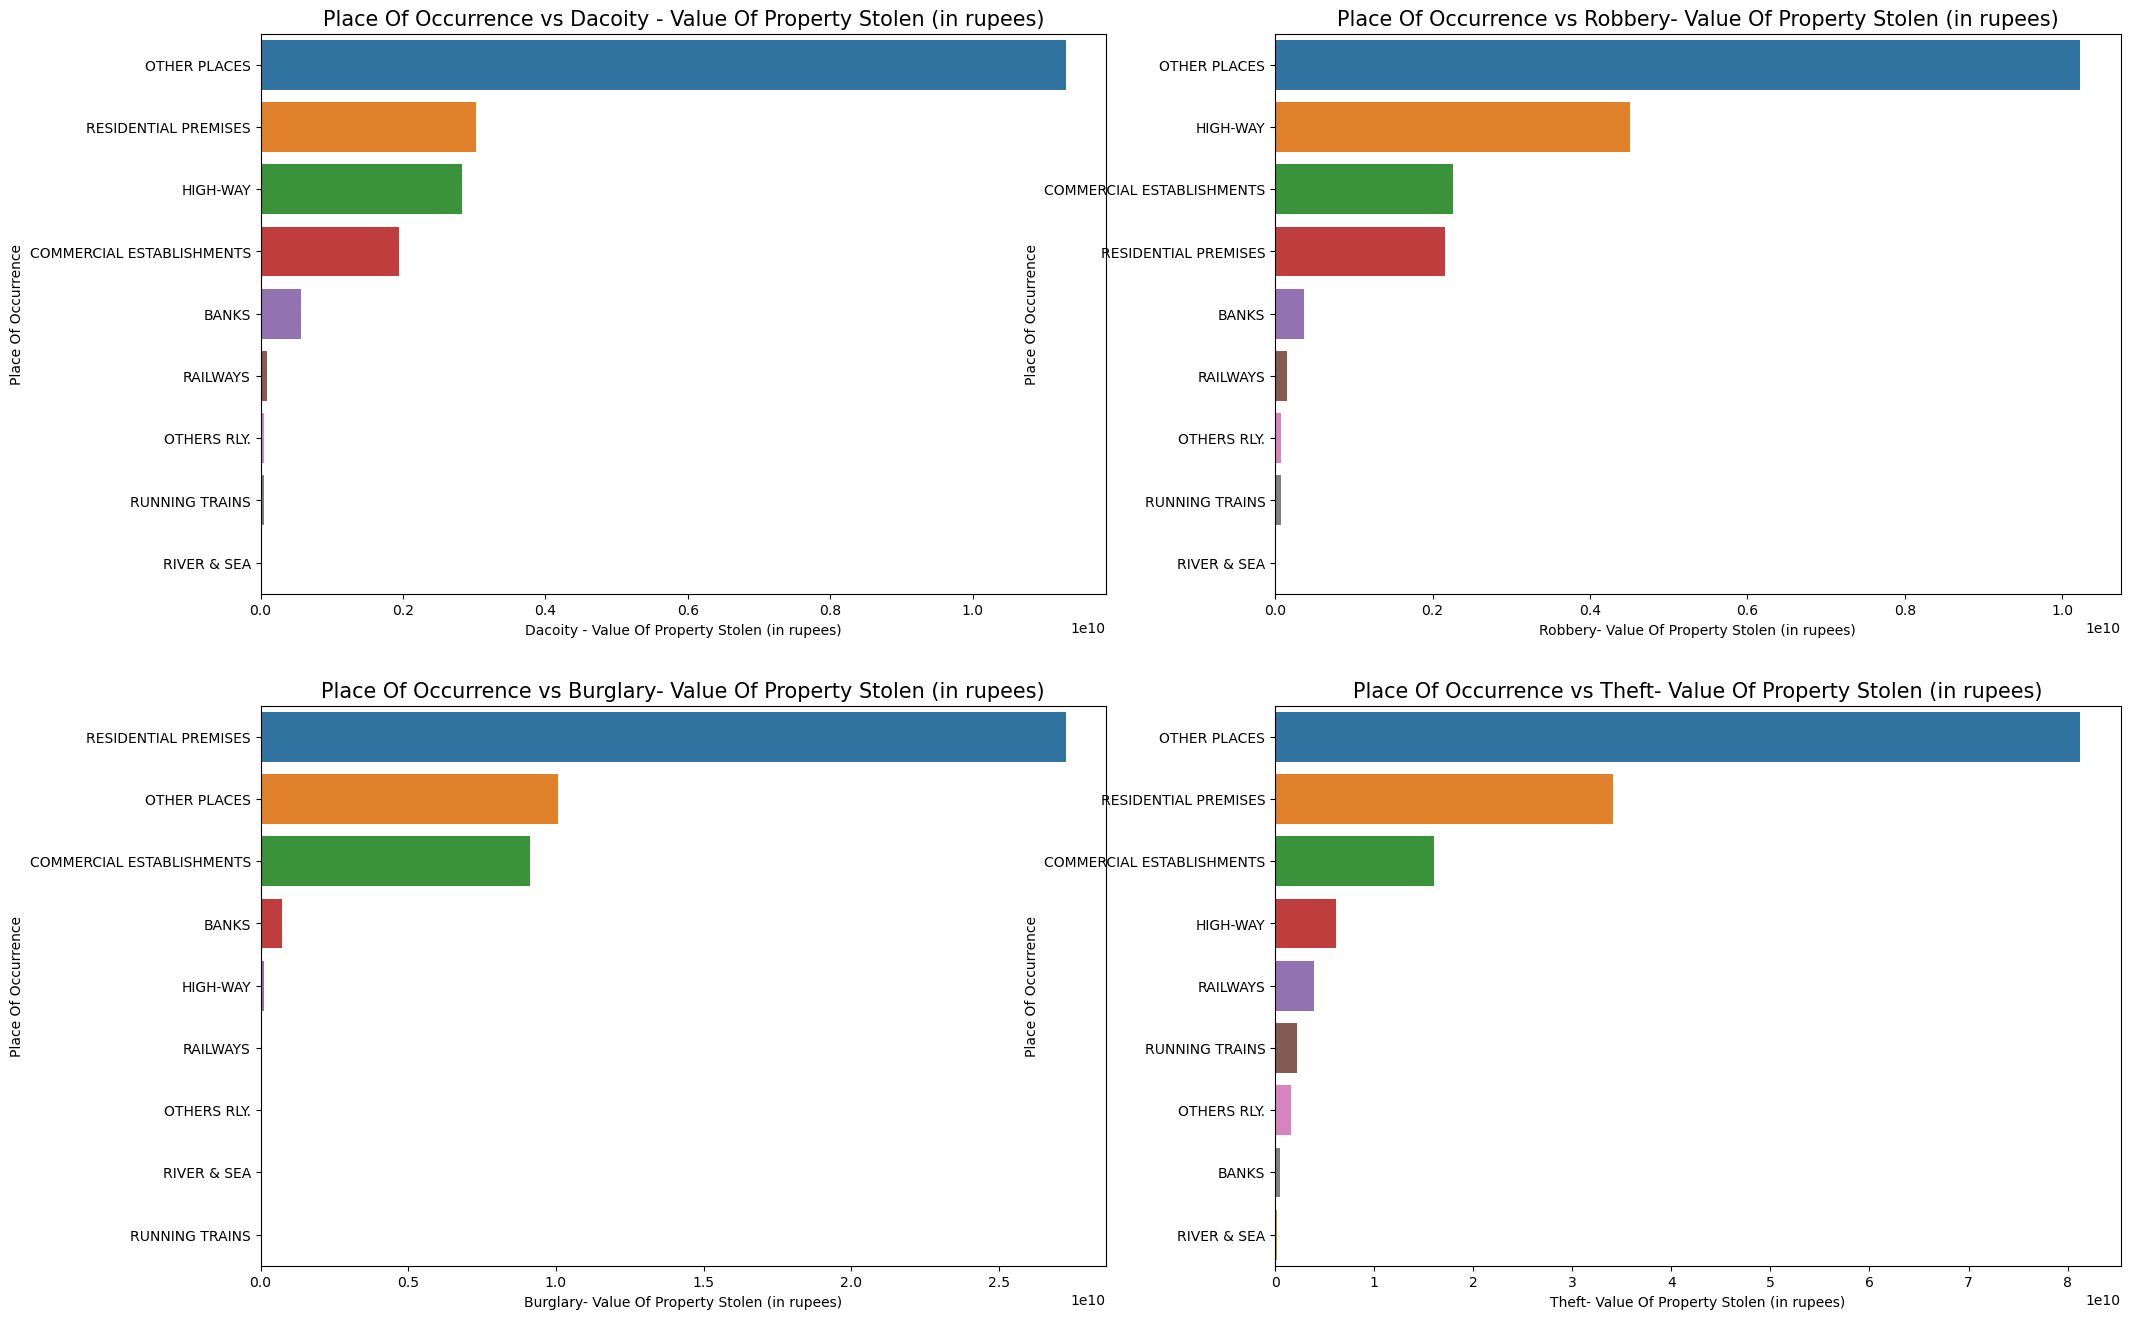

In [87]:
plt.figure(figsize=(24,16))
plot=1
cols = ['Dacoity - Value Of Property Stolen (in rupees)',
       'Robbery- Value Of Property Stolen (in rupees)',
       'Burglary- Value Of Property Stolen (in rupees)',
       'Theft- Value Of Property Stolen (in rupees)']
for i in cols :
    if plot <= 4 :
        ax= plt.subplot(2,2,plot)
        dtt = dff.groupby('Place Of Occurrence')[i].sum().sort_values(ascending=False).reset_index()
        sns.barplot(x=dtt[i] , y=dtt['Place Of Occurrence'] , data=dtt)
        plt.title('Place Of Occurrence vs {}'.format(i),fontsize=15)
    plot +=1
plt.show()    

- other unlabelled places scored the highest values of economic loss for the assets around it because of crimes of Dacoity , robbery and theft
- residential premises suffered and struggled hard in the decade in india because of Burglary crimes

In [72]:
dff.groupby(['Place Of Occurrence','YEAR']).sum('total crimes')

Dacoity - Number of cases registered  \
Place Of Occurrence YEAR                                         
BANKS               2001                                    57   
                    2002                                    72   
                    2003                                    62   
                    2004                                    69   
                    2005                                    73   
...                                                        ...   
RUNNING TRAINS      2008                                    87   
                    2009                                    86   
                    2010                                    87   
                    2011                                    74   
                    2012                                    45   

                          Dacoity - Value Of Property Stolen (in rupees)  \
Place Of Occurrence YEAR                                                   
BANKS               2001                                        31077543   
                    2002                                        28929610   
                    2003                                        36594245   
                    2004                                        73592932   
                    2005                                        38835768   
...                                                                  ...   
RUNNING TRAINS      2008                                         3454494   
                    2009                                         3631985   
                    2010                                         3488605   
                    2011                                         2325349   
                    2012                                         4815213   

                          Robbery- Number of cases registered  \
Place Of Occurrence YEAR                                        
BANKS               2001                                   82   
                    2002                                  133   
                    2003                                  101   
                    2004                                  102   
                    2005                                   85   
...                                                       ...   
RUNNING TRAINS      2008                                  167   
                    2009                                  213   
                    2010                                  346   
                    2011                                  378   
                    2012                                  364   

                          Robbery- Value Of Property Stolen (in rupees)  \
Place Of Occurrence YEAR                                                  
BANKS               2001                                       13614558   
                    2002                                       33487008   
                    2003                                       37470524   
                    2004                                       22027445   
                    2005                                       35142212   
...                                                                 ...   
RUNNING TRAINS      2008                                        2714747   
                    2009                                        5252906   
                    2010                                       11220599   
                    2011                                        8247431   
                    2012                                       16500141   

                          Burglary- Number of cases registered  \
Place Of Occurrence YEAR                                         
BANKS               2001                                   543   
                    2002                                   517   
                    2003                                   325   
                    2004  

# 2.3 Analysis of year-on-year total crime rate

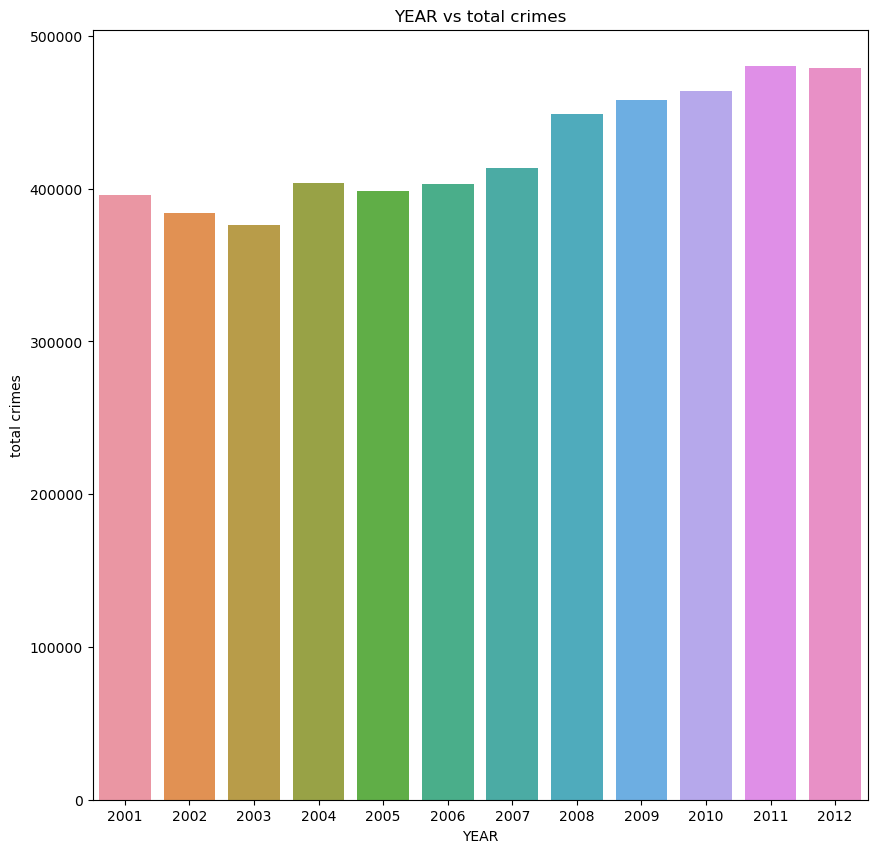

In [89]:
plt.figure(figsize=(10,10))
dt = dff.groupby('YEAR')['total crimes'].sum().sort_values(ascending=False).reset_index()
sns.barplot(y='total crimes' , x='YEAR' , data=dt)
plt.title('YEAR vs total crimes')
plt.show()

- year 2011 scored the highest number of property's crimes

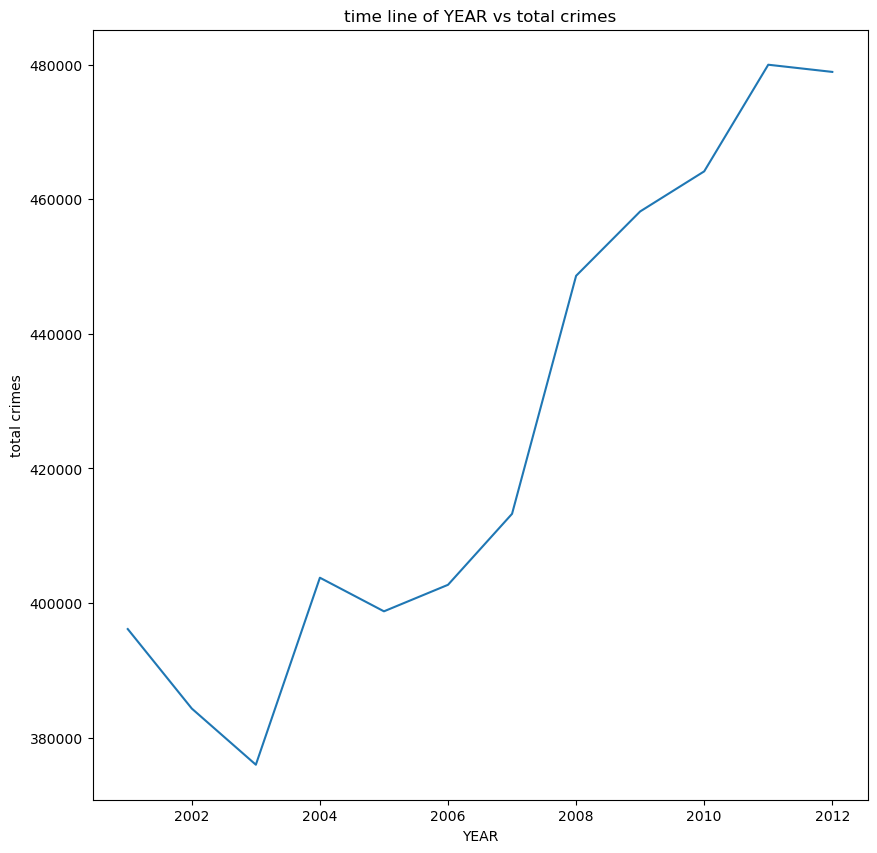

In [91]:
plt.figure(figsize=(10,10))
dt = dff.groupby('YEAR')['total crimes'].sum()
sns.lineplot(data = dt)
plt.title('time line of YEAR vs total crimes')
plt.show()

crimes of stealing properties increased between 2001 to 2003 to get back to increase rapidly from 2003 to reach its peak in 2011 which is an alarm for the deteriorating conditions of security and social and economic stability

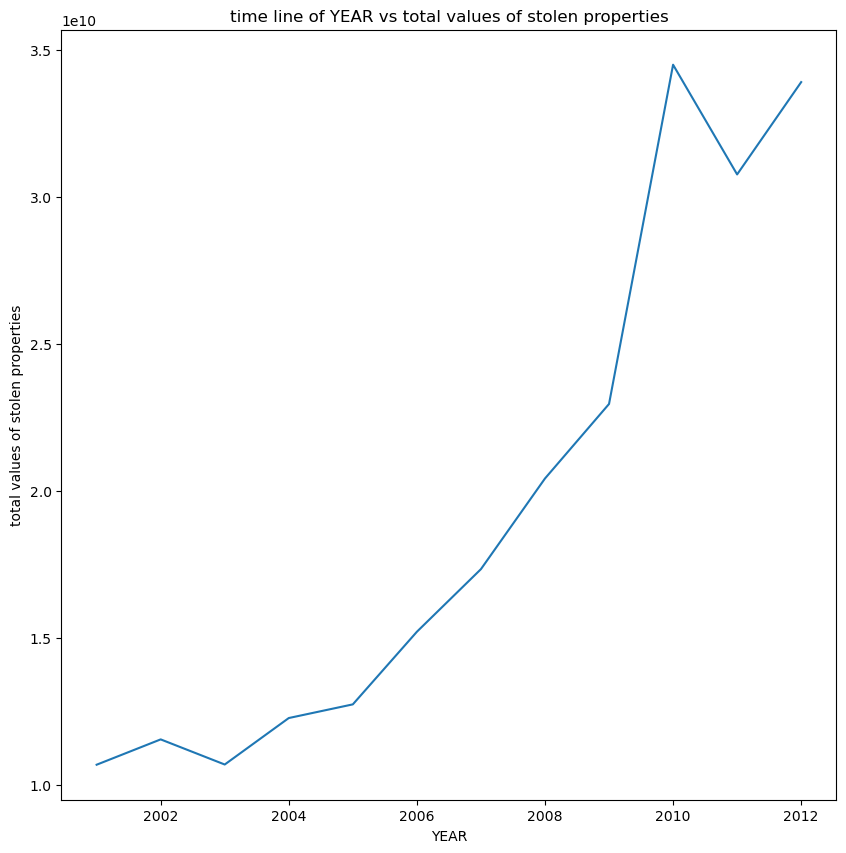

In [92]:
plt.figure(figsize=(10,10))
dt = dff.groupby('YEAR')['total values of stolen properties'].sum()
sns.lineplot(data = dt)
plt.title('time line of YEAR vs total values of stolen properties')
plt.show()

- economic losses in setor of properties had increased rapidly in the last decade to reach its peak in 2010

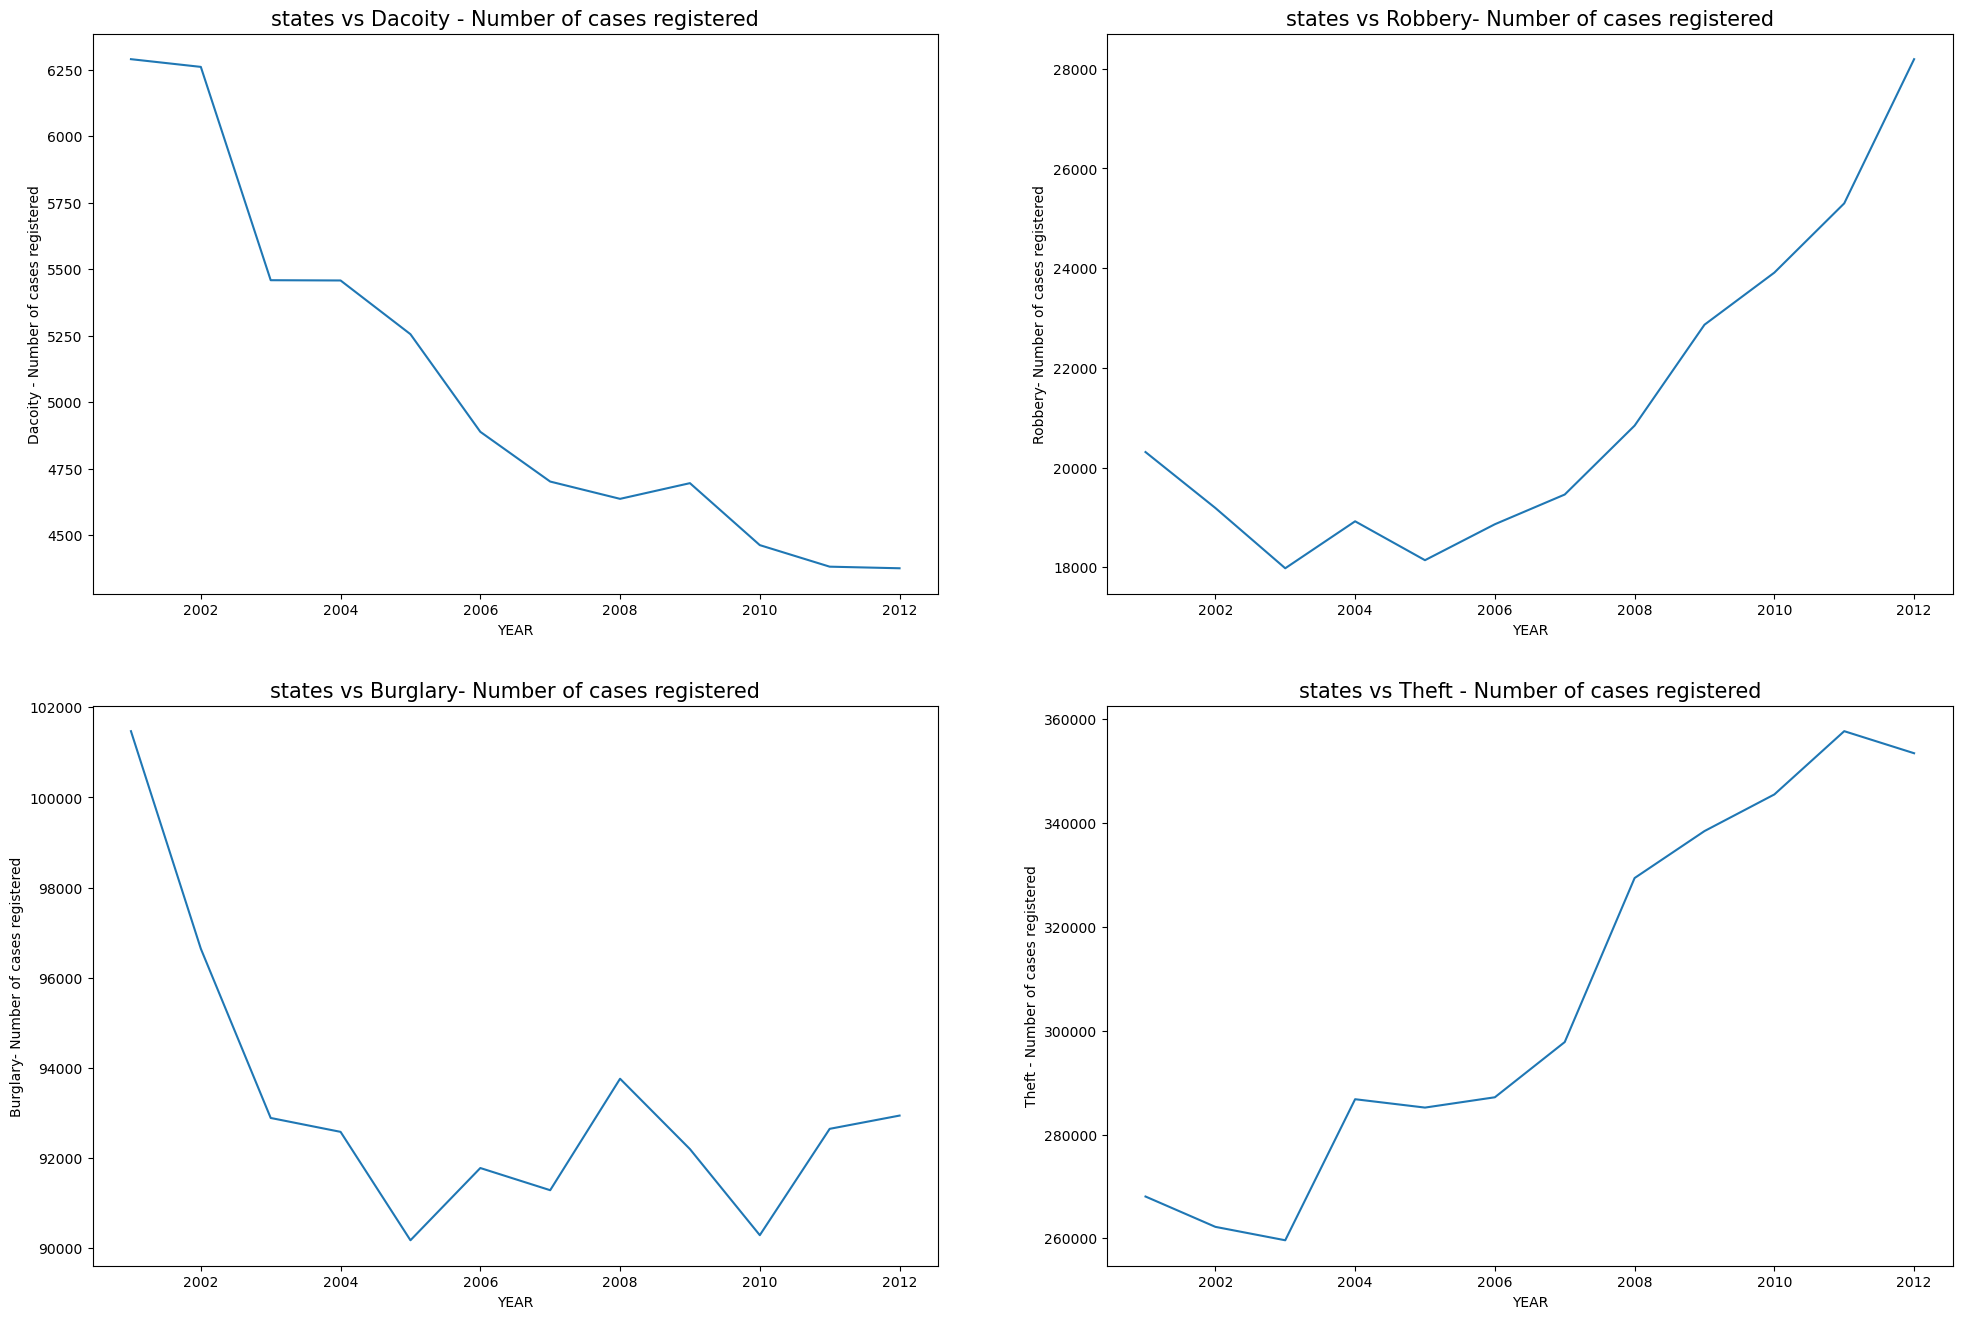

In [94]:
plt.figure(figsize=(24,16))
plot=1
cols = ['Dacoity - Number of cases registered' ,'Robbery- Number of cases registered',
       'Burglary- Number of cases registered' , 'Theft - Number of cases registered']
for i in cols :
    if plot <= 4 :
        ax= plt.subplot(2,2,plot)
        dtt = dff.groupby('YEAR')[i].sum()
        sns.lineplot(data=dtt)
        plt.title('states vs {}'.format(i),fontsize=15)
    plot +=1
plt.show()    

crimes of Robbery and Theft had increased rapidly in the last decade to cause severe economic loss in properties' sector while crimes of Dacoity and Burglary decreased

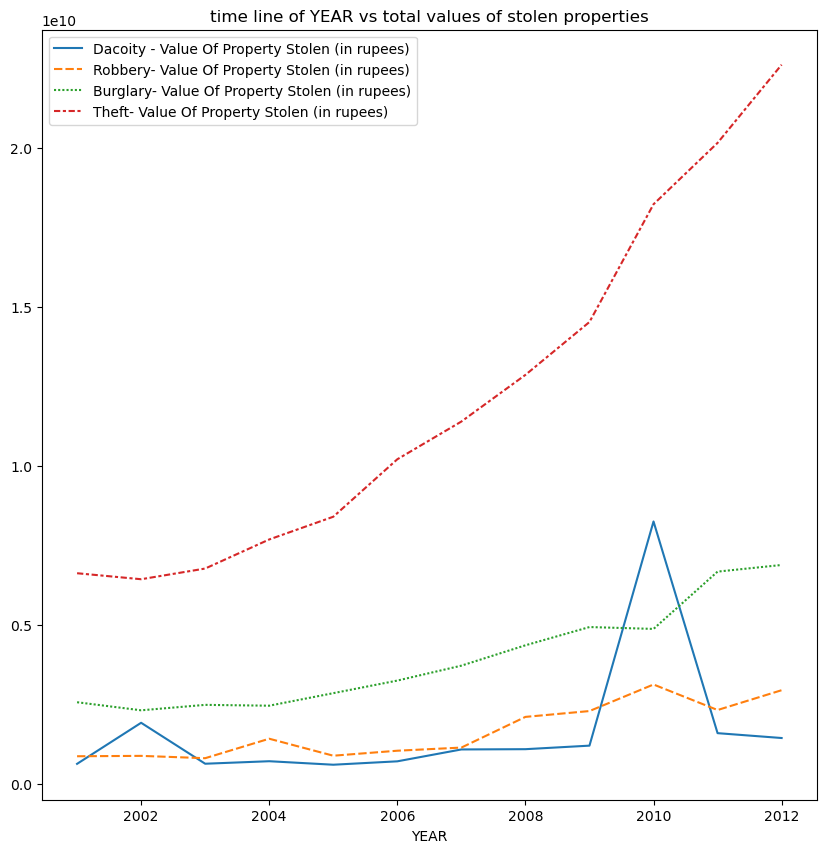

In [95]:
plt.figure(figsize=(10,10))
dt = dff.groupby('YEAR')[['Dacoity - Value Of Property Stolen (in rupees)',
       'Robbery- Value Of Property Stolen (in rupees)',
       'Burglary- Value Of Property Stolen (in rupees)',
       'Theft- Value Of Property Stolen (in rupees)']].sum()
sns.lineplot(data = dt)
plt.title('time line of YEAR vs total values of stolen properties')
plt.show()

from above summury we indicate that:
- the majority of economic loss in sector of property is because of Theft crimes
- Dacoity crimes caused the least effect on economy among all types of crimes but it increased in 2010
- Burglary is the second type of crimes which caused losses in property's sector despite of decreasing number of dacoity crimes in the last decades but that is because of the valuable assets that were exposed to burglary

# 2.4 Analysis of area vs overall crime

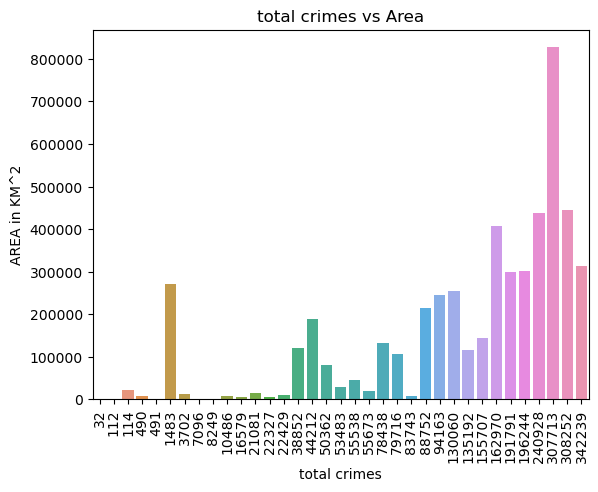

In [96]:
dt = dff.groupby('Area km^2')['total crimes'].sum().sort_values(ascending=False).reset_index()
sns.barplot(y='total crimes' , x='Area km^2' , data=dt)
plt.title('total crimes vs Area')
plt.xlabel('total crimes')
plt.ylabel('AREA in KM^2')
plt.xticks(rotation=90)
plt.show()

- Area 307713 km^2 has the highest number of crimes while Area 32 km^2 has the lowest crimes
- Areas above 15000 Km^2 scored 200000 crimes in the last decade
- criminality of properties increasing in widen areas

# 2.5 Analysis of Population vs overall Crime

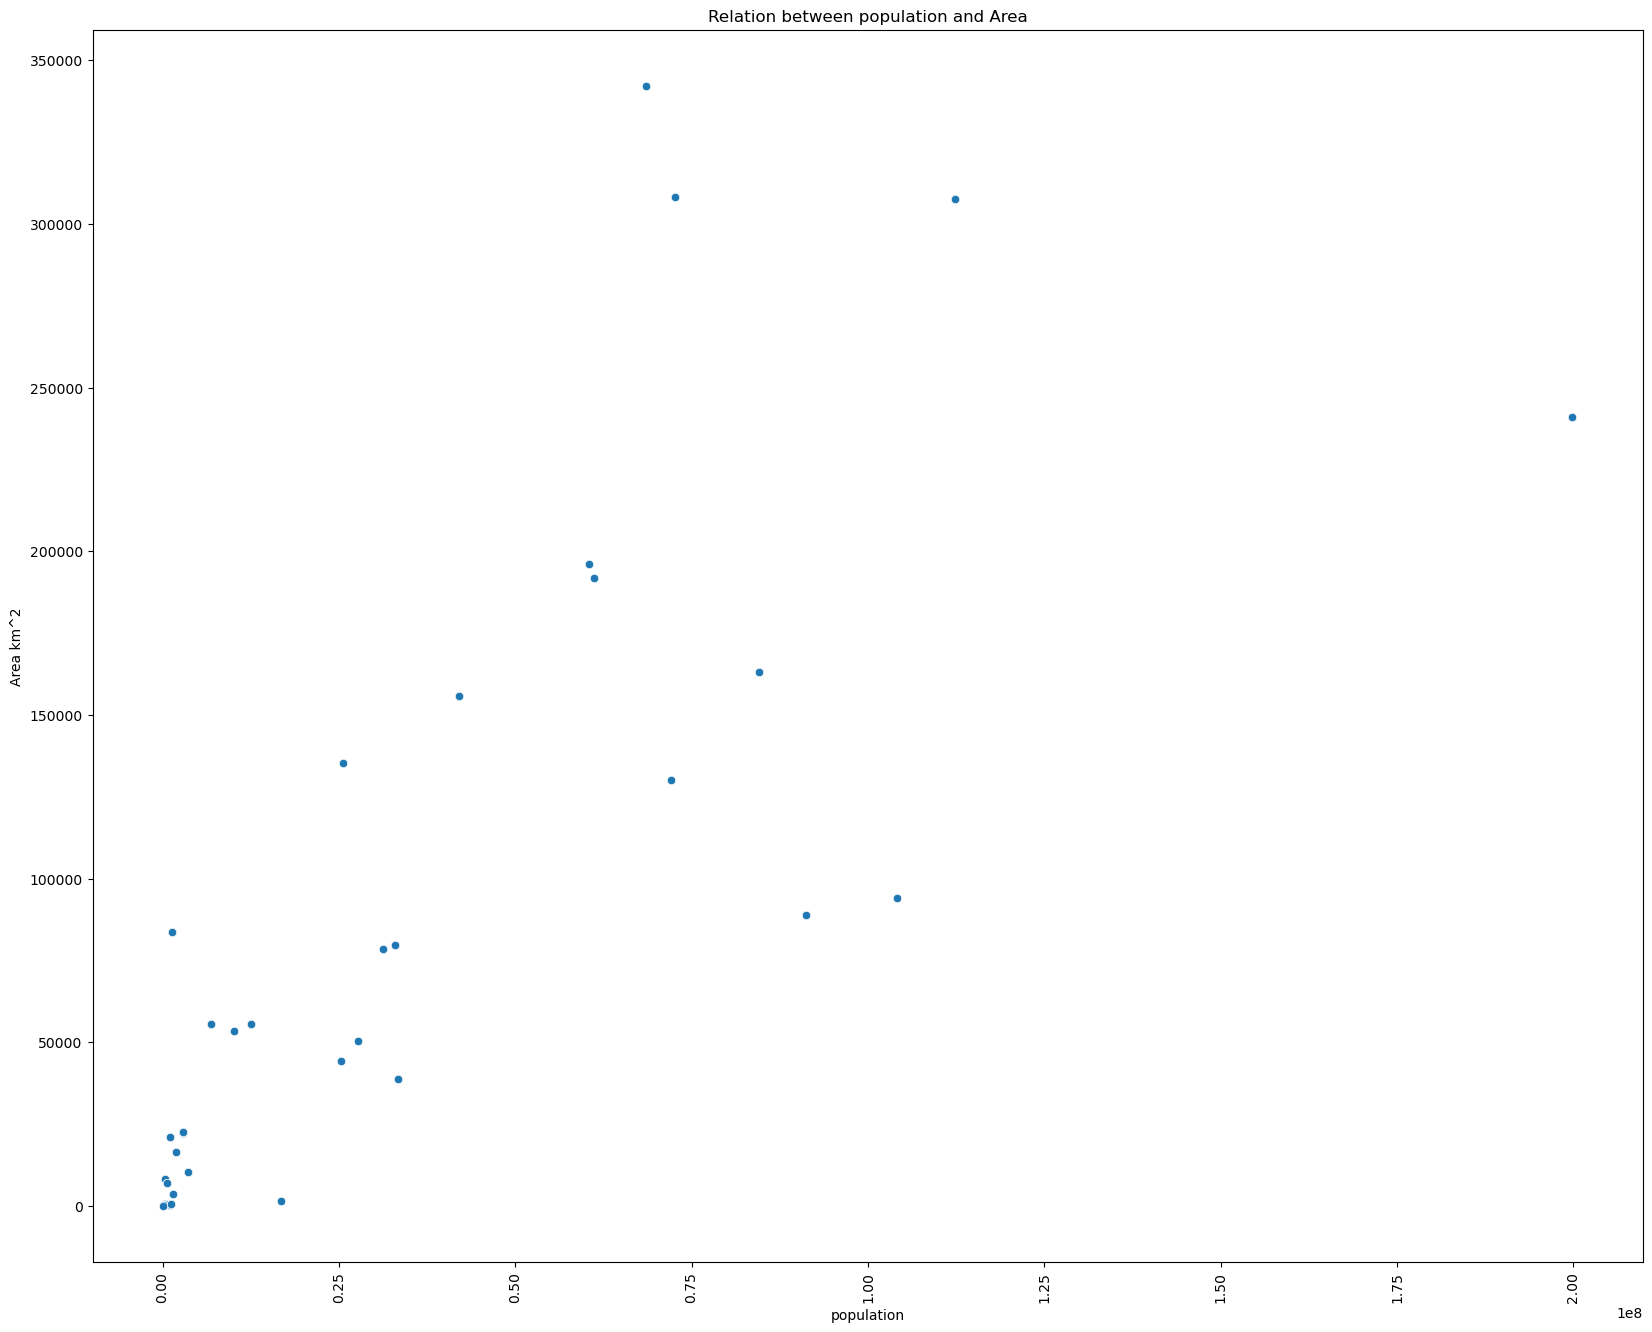

In [98]:
data = dff[dff['YEAR'] == 2011]
plt.figure(figsize=(20,16))
sns.scatterplot(x=data['population'] , y=data['Area km^2'] )
plt.title('Relation between population and Area')
plt.xticks(rotation=90)
plt.show()


-    In INdia the majority of states are highly density populated
 -   Delhi is the highest populated density state
  -  ARUNACHAL PRADESH is the lowest populated state



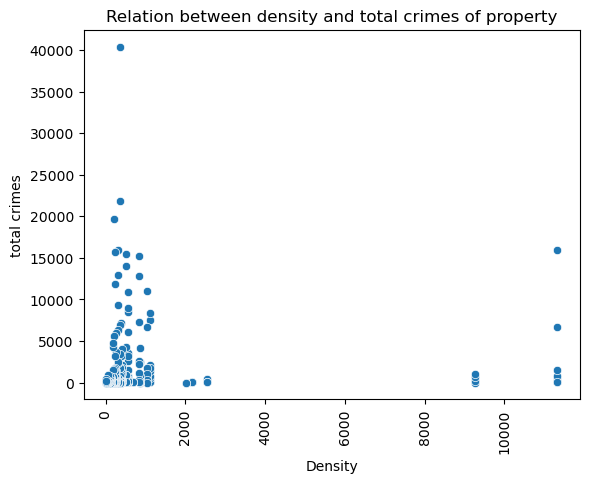

In [99]:
data = dff[dff['YEAR'] == 2010]
popu = data[['Density','total crimes']].sort_values(by='Density' , ascending=False).reset_index()
sns.scatterplot(x=popu['Density'] , y=popu['total crimes'] )
plt.title('Relation between density and total crimes of property')
plt.xticks(rotation=90)
plt.show()

according to statistics in 2011 we conclude that :
- in india the vast majority of state are highly densily populated as the standard density of population is 45 km^2
- in india Populated area does not make it more prone to criminality
- in 2011 the vast majority of crimes of properties happened in areas with density lower than 2000 persons per km^2
- the highest number of crimes above 40000 happened in an area with density lower than 2000 persons per km^2 and it is not the most highly densily populated which says rates of crimes and areas are variable and not coorrelated positively